## Preparation

In [0]:
import os
import json
import ast
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import keras
from wordcloud import WordCloud, STOPWORDS

%matplotlib inline

Using TensorFlow backend.


In [0]:
# before use data
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
# get the work directory
os.chdir('/content/gdrive/My Drive/STAT-628-3')
# show the files in the wd
print('The work directory contains:')
!ls

The work directory contains:
business.json  images		models	     tip.json
data	       load_data.ipynb	review.json  user.json


In [0]:
# # check ram
# !cat /proc/meminfo

## Confusion matrix for Attributes

In [0]:
att = pd.read_csv('data/att_data_clean.csv')

In [0]:
att.head(3)

Unnamed: 0             business_id  ... WheelchairAccessible_imp  park_imp
0           1  1Dfx3zM-rW4n-31KeC8sJg  ...                     True     False
1           2  tstimHoMcYbkSC4eBA1wEg  ...                     True     False
2           3  NPHZkn1e-tSJAbo8Zm9rYw  ...                     True     False

[3 rows x 81 columns]

In [0]:
def my_matrix(df, attribute, include_NA = False, class_sort = None, level_type = 'numeric'):
    '''
    df: data frame
    attribute: a string of the attribute we want to show
    include_NA: a bool, include missing values or not
    class_sort: a list, the sorted classes, if any
    level_type: numeric or categorical
    '''
    df = df.copy()
    df[attribute].fillna("NA", inplace=True)
    classes = list(df[attribute].unique()) # the classes of this attribute
    
    if class_sort:
        classes = class_sort

    if (not include_NA) and ("NA" in classes):
        classes.remove("NA") # drop "NA"
    
    if level_type == 'numeric':
        level = [1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]
        level.reverse()
        count = [[0] * len(classes) for _ in range(len(level))] # count of each class
        for i in range(df.shape[0]): # index
            for j in range(len(classes)): # classes
                for k in range(len(level)): # stars: 1 ~ 5
                    if (df[attribute][i] == classes[j]) & (df['stars'][i] == level[k]):
                        count[k][j] += 1
                        break
    
    elif level_type == 'categorical':
        level = ['Negative', 'Positive']
        level.reverse()
        count = [[0] * len(classes) for _ in range(len(level))] # count of each class
        for i in range(df.shape[0]): # index
            for j in range(len(classes)): # classes
                if (df[attribute][i] == classes[j]) & (df['stars'][i] <= 3.):
                    count[1][j] += 1
                elif (df[attribute][i] == classes[j]) & (df['stars'][i] > 3.):
                    count[0][j] += 1


    
    confusion_matrix = np.array(count, dtype=np.float64)
    
    plt.figure(figsize=(10,10))
    plt.imshow(confusion_matrix, interpolation='nearest', cmap=plt.cm.Oranges) # plot the matrix
    plt.title(attribute + ' vs. Ratings\n', fontdict = {'fontsize': 40})
    plt.colorbar()
    tick_marks_x = np.arange(len(classes))
    tick_marks_y = np.arange(len(level))
    plt.xticks(tick_marks_x, classes, fontsize=20)
    plt.yticks(tick_marks_y, level, fontsize=20)
    
    for i in range(len(classes)):
        for j in range(len(level)):
            plt.text(i, j, format(int(confusion_matrix[j][i])), fontdict = {'fontsize': 20})
    
    plt.ylabel('Ratings', fontsize = 30)
    plt.xlabel('Attribute levels', fontsize = 30)
    plt.tight_layout()
    plt.savefig('images/matrix/' + level_type + '/' + attribute + '.jpg')

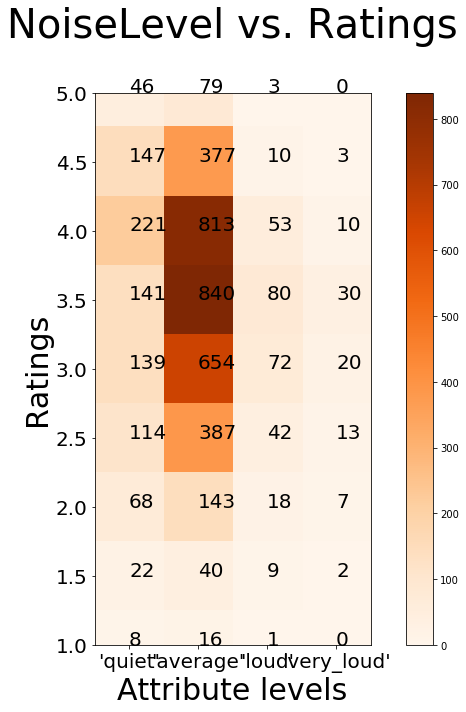

In [0]:
my_matrix(att, 'NoiseLevel', include_NA = False, class_sort = ["'quiet'", "'average'", "'loud'", "'very_loud'"], level_type = 'numeric')

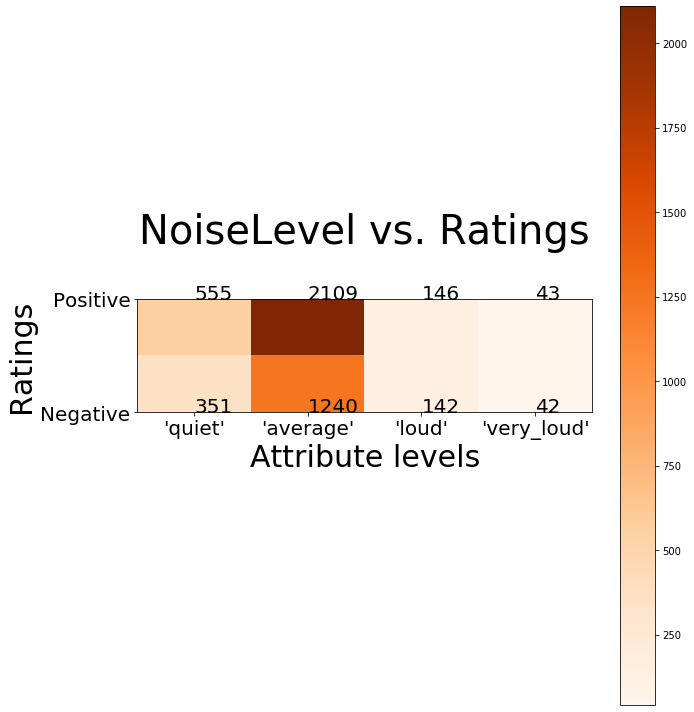

In [0]:
my_matrix(att, 'NoiseLevel', include_NA = False, class_sort = ["'quiet'", "'average'", "'loud'", "'very_loud'"], level_type = 'categorical')

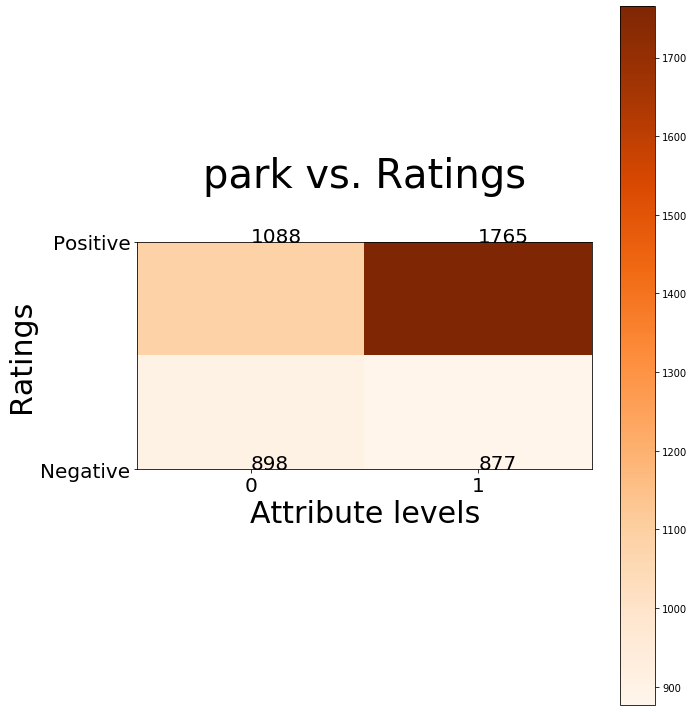

In [0]:
my_matrix(att, 'park', include_NA = False, level_type = 'categorical')

In [0]:
def save_plot_matrixs(df, columns, level_type = 'numeric'):
    '''
    df: attribute data frame
    columns: a list of attributes we want to analyze
    level_type: numeric or categorical
    '''
    for attribute in columns:
        if attribute == "NoiseLevel":
            my_class_sort = ["'quiet'", "'average'", "'loud'", "'very_loud'"]
        elif attribute == "WiFi":
            my_class_sort = ["'no'", "'free'", "'paid'"]
        elif attribute == "RestaurantsAttire":
            my_class_sort = ["'casual'", "'formal'", "'dressy'"]
        else:
            my_class_sort = None
        my_matrix(att, attribute, class_sort = my_class_sort, level_type=level_type)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


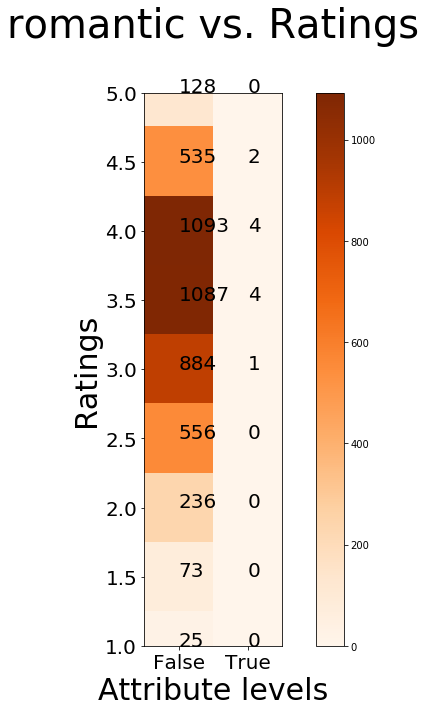

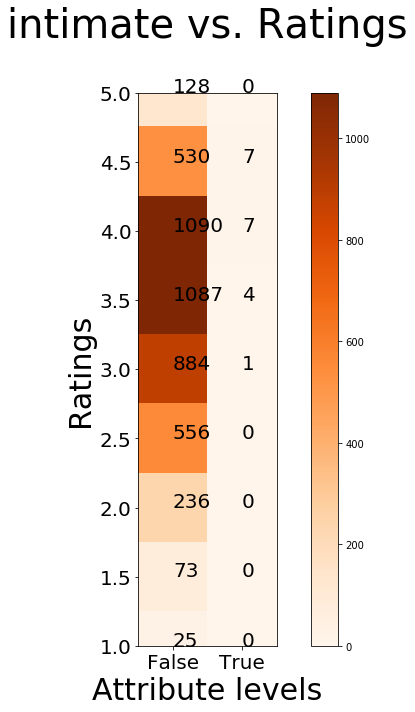

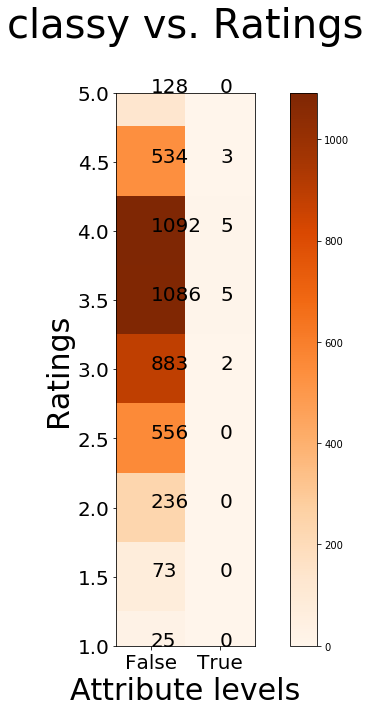

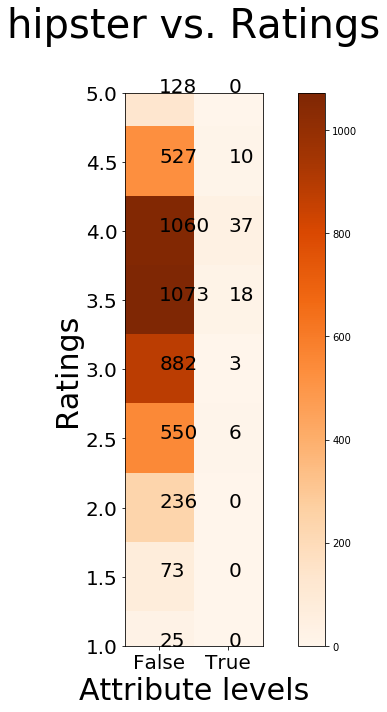

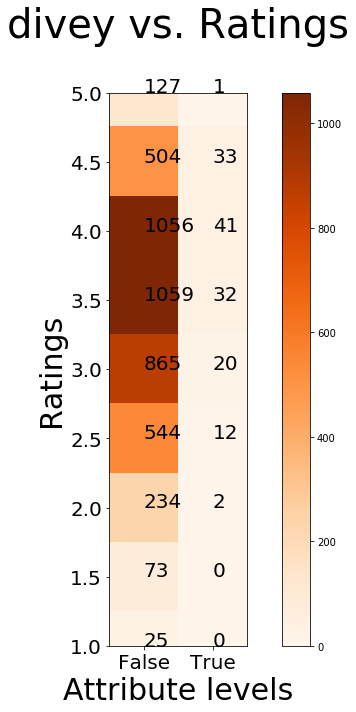

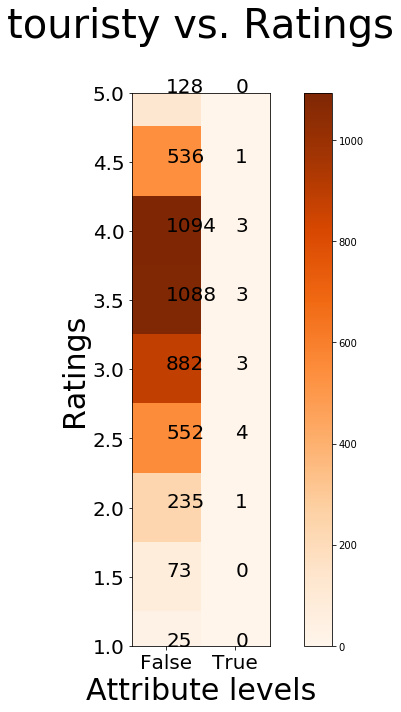

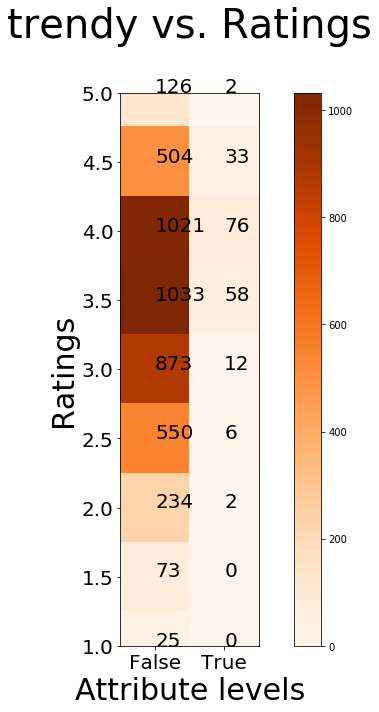

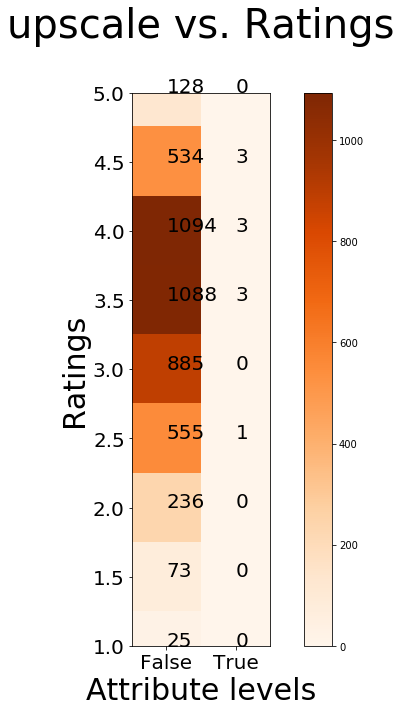

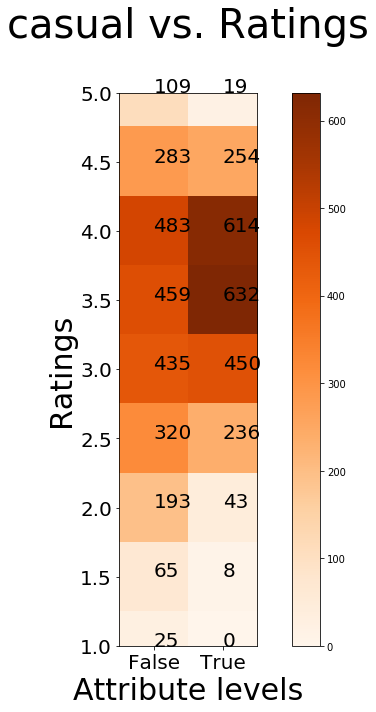

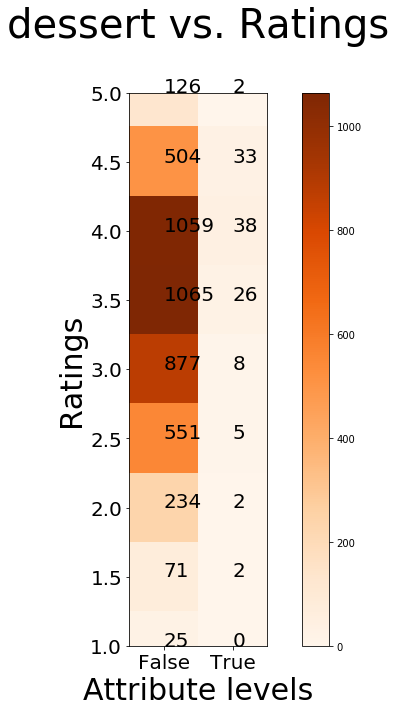

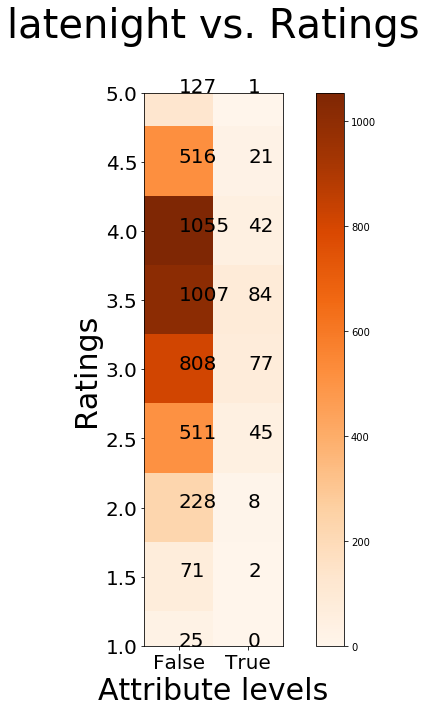

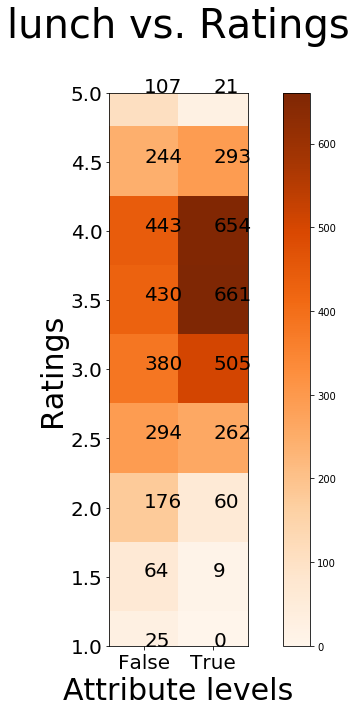

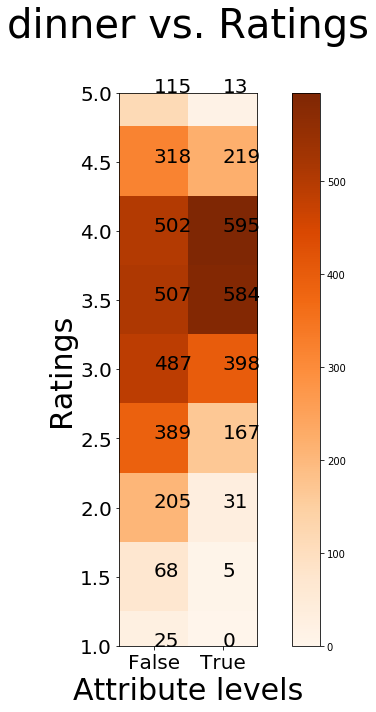

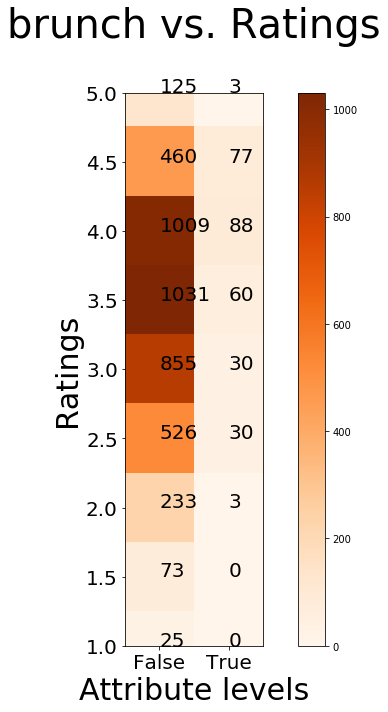

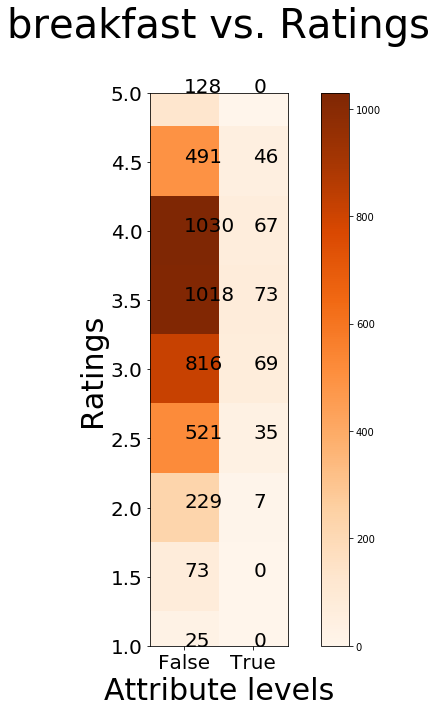

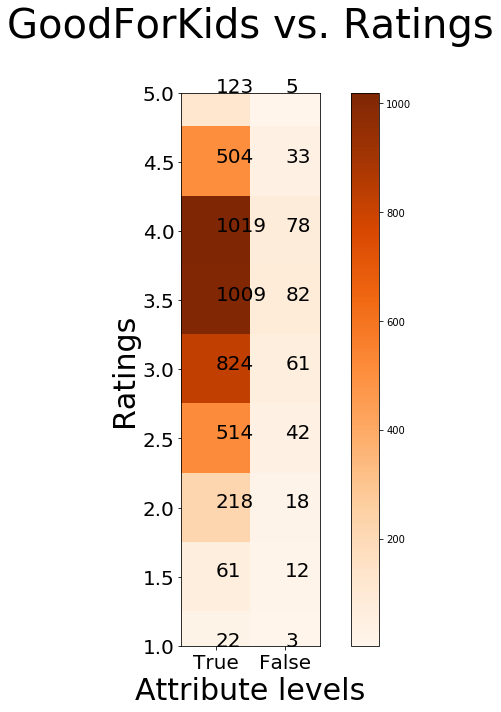

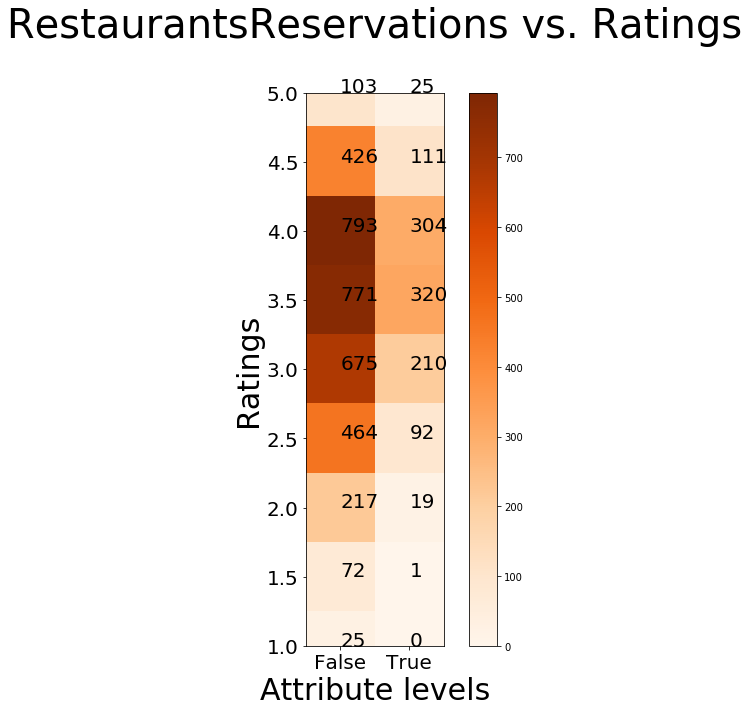

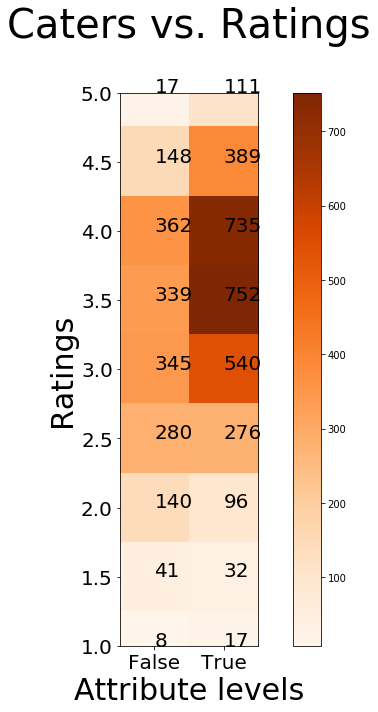

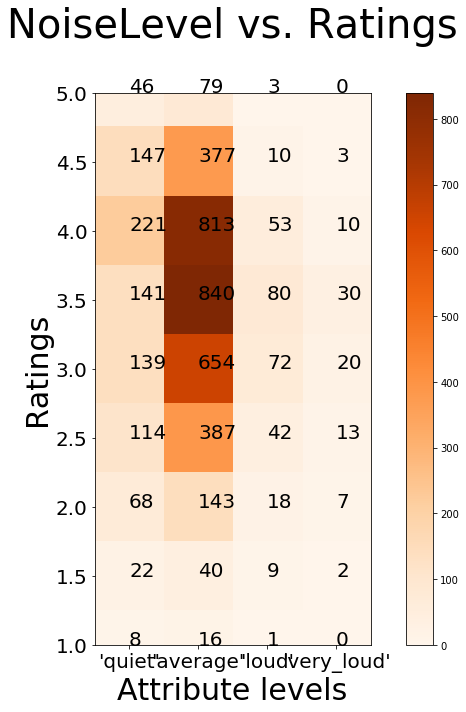

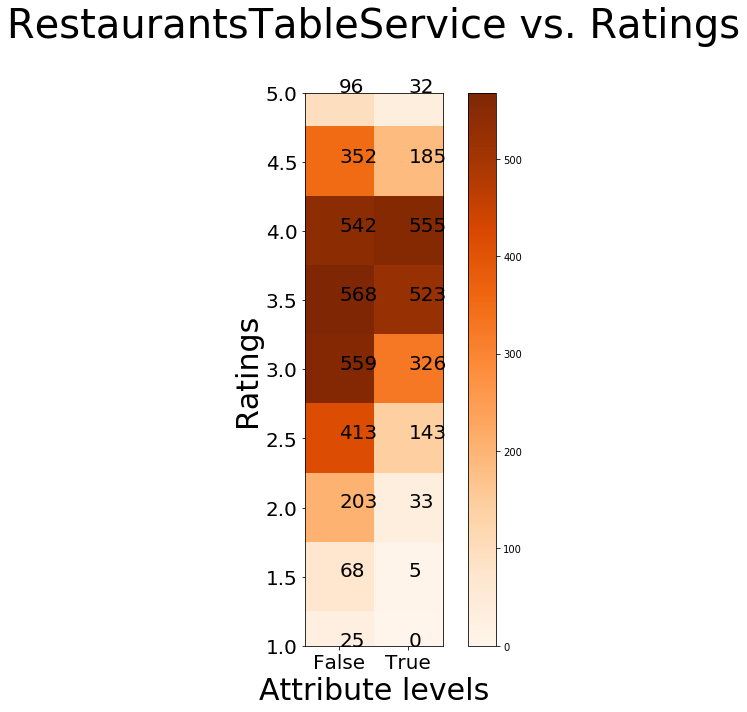

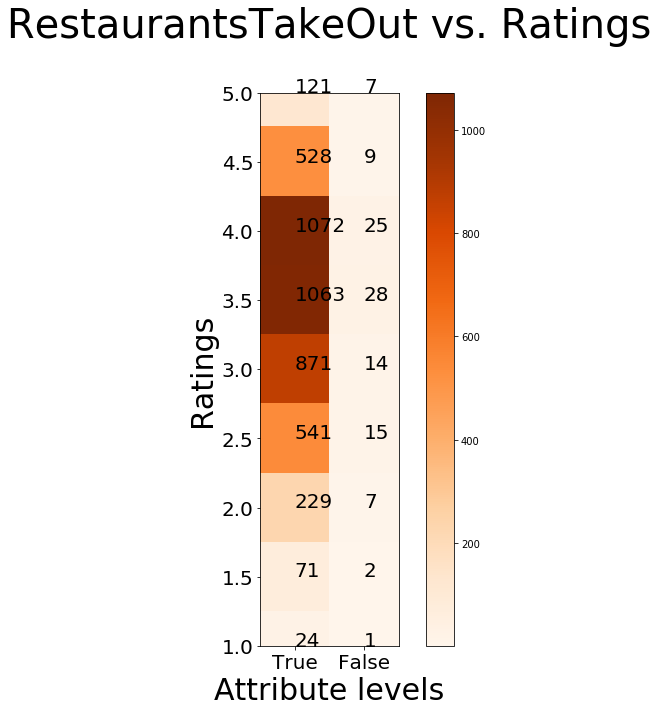

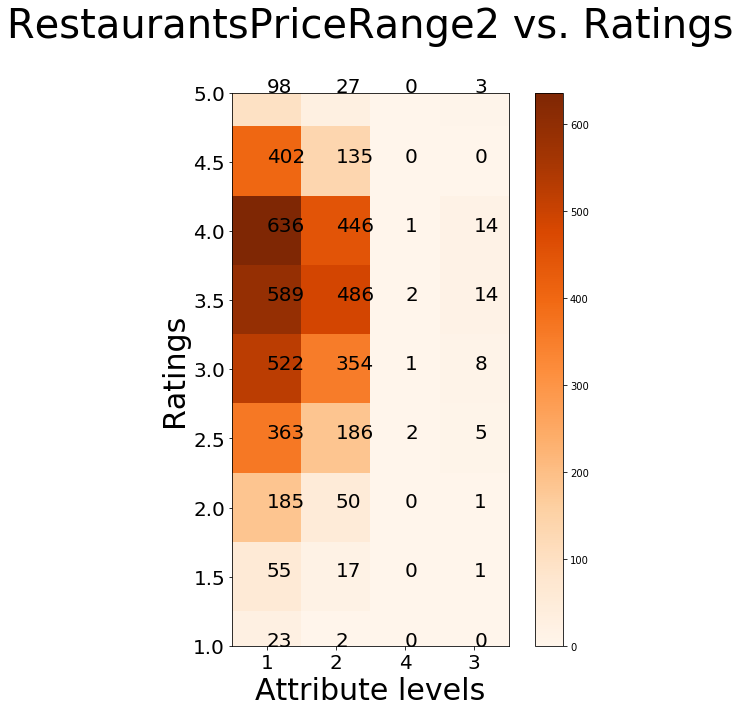

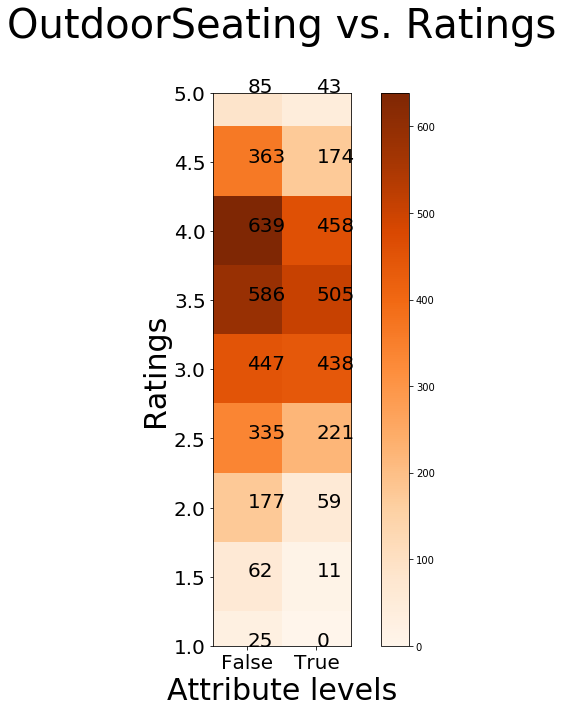

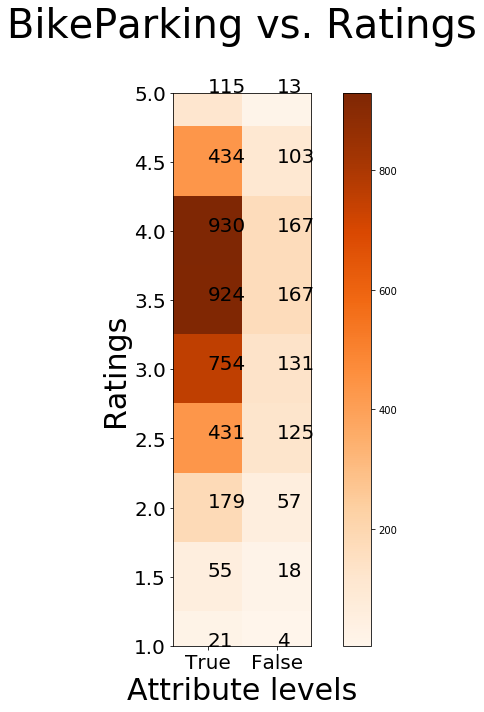

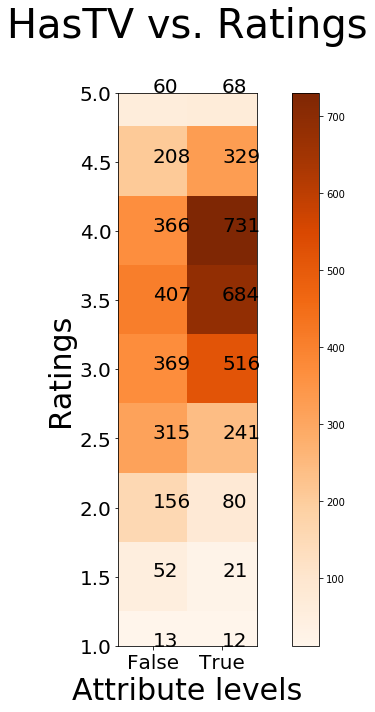

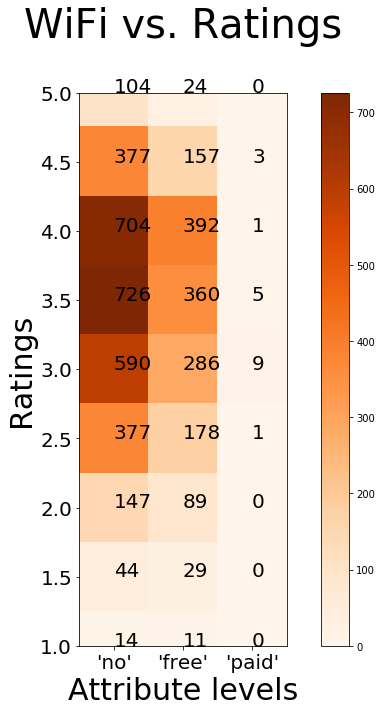

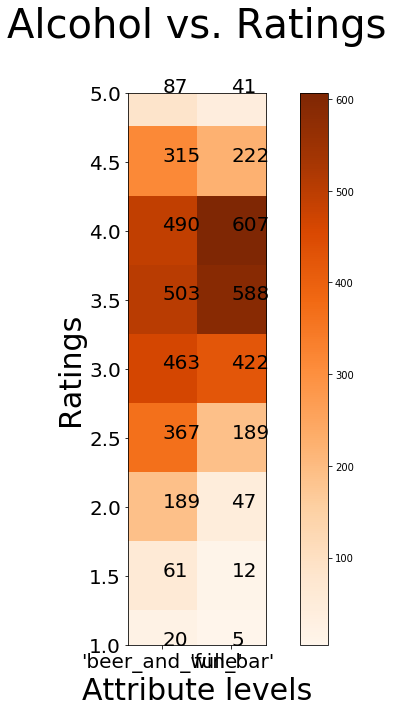

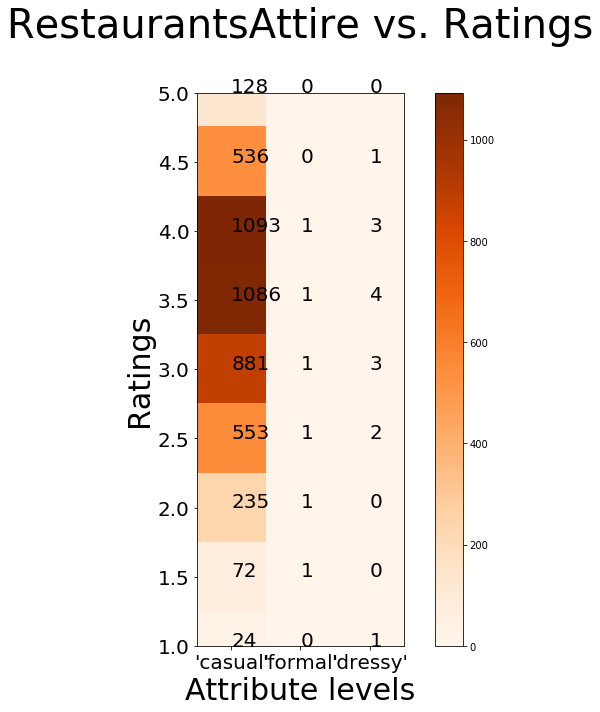

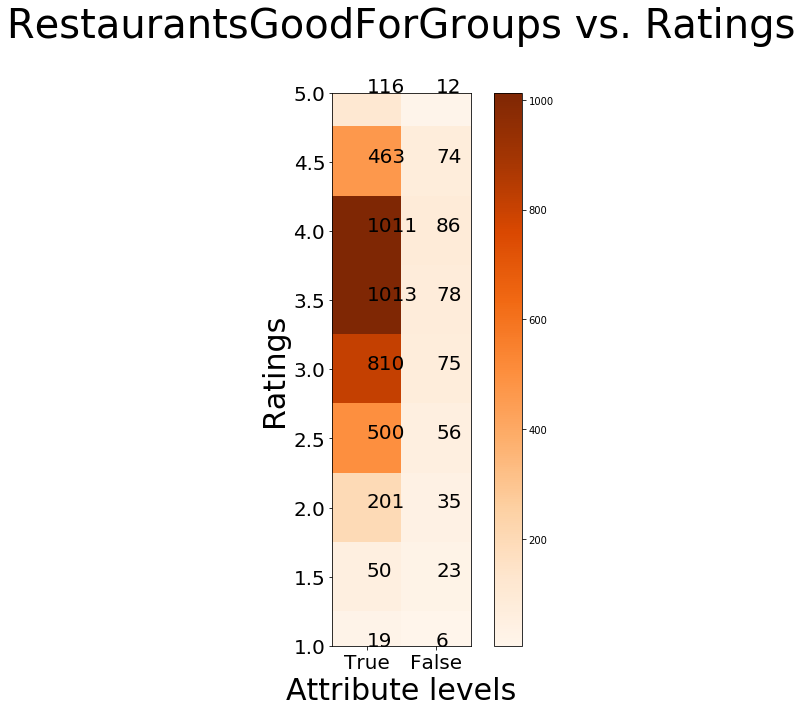

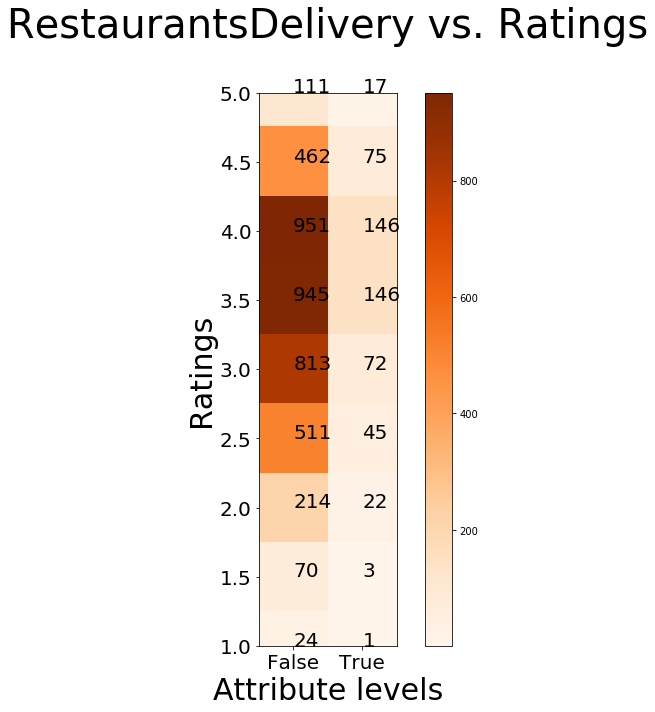

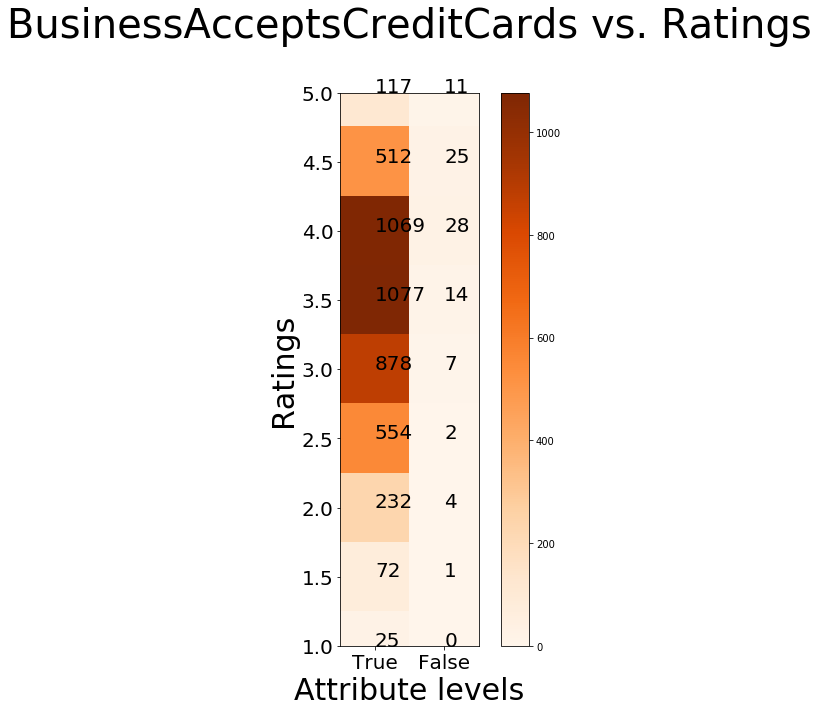

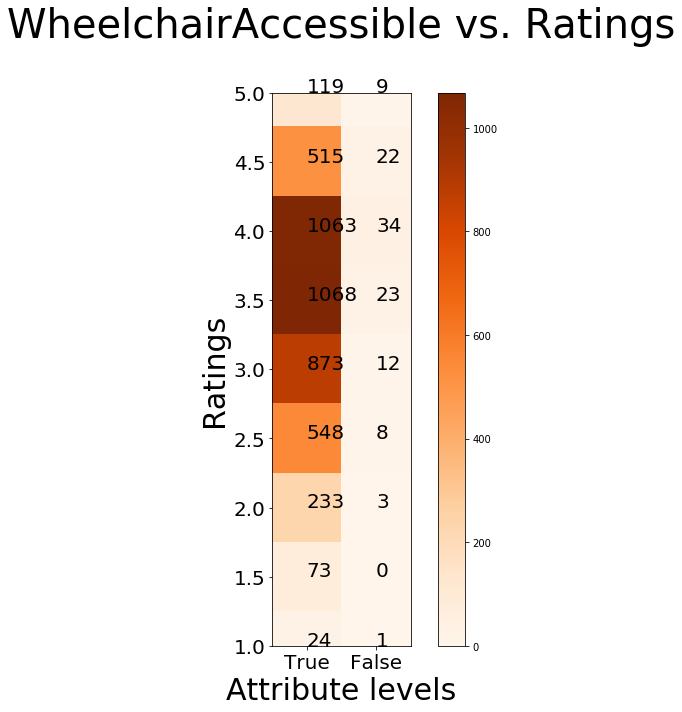

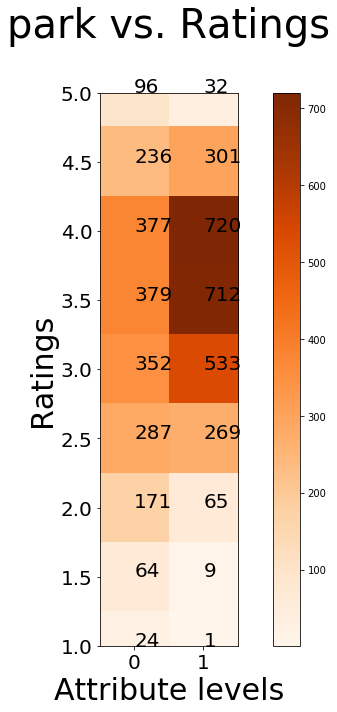

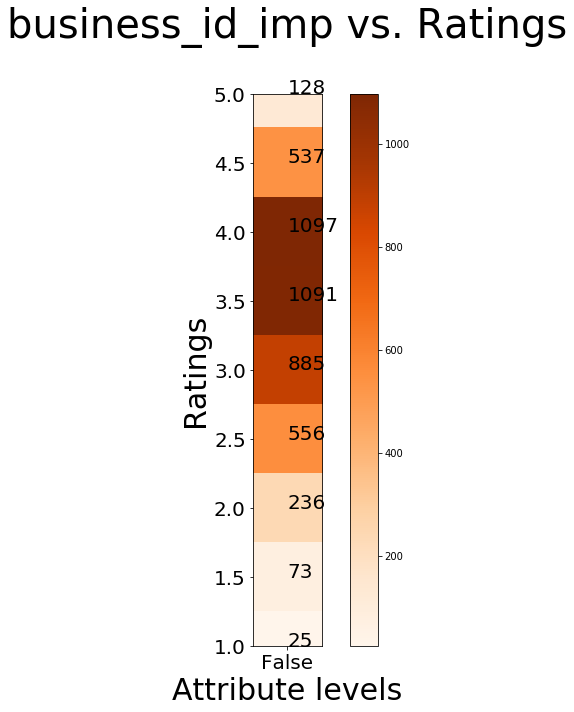

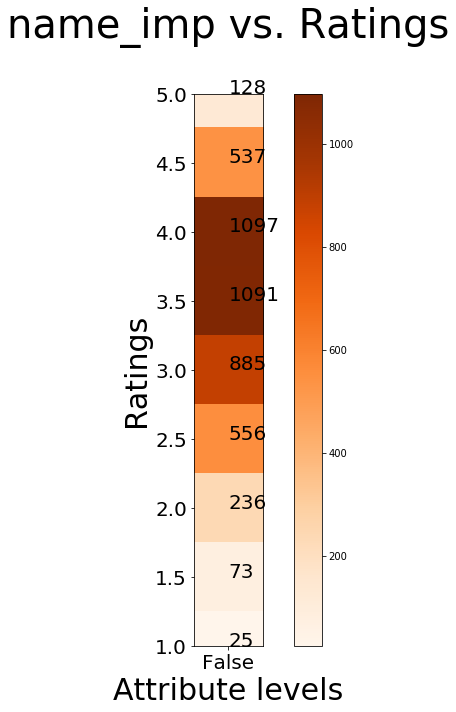

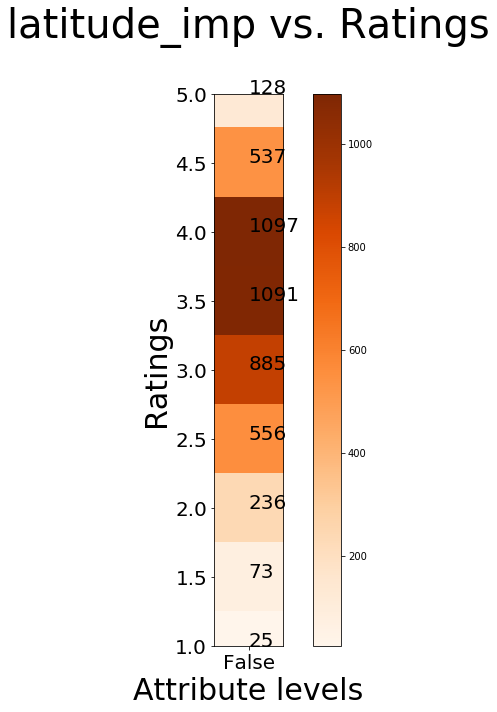

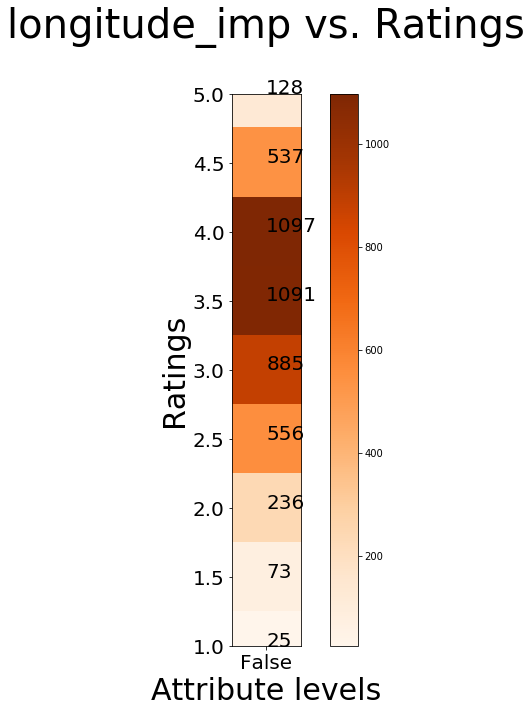

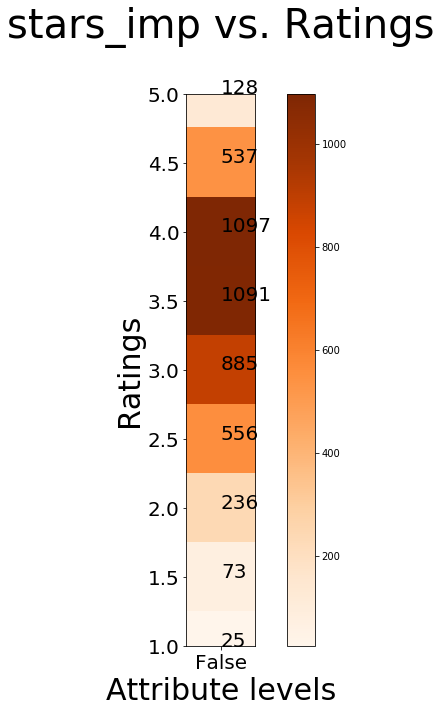

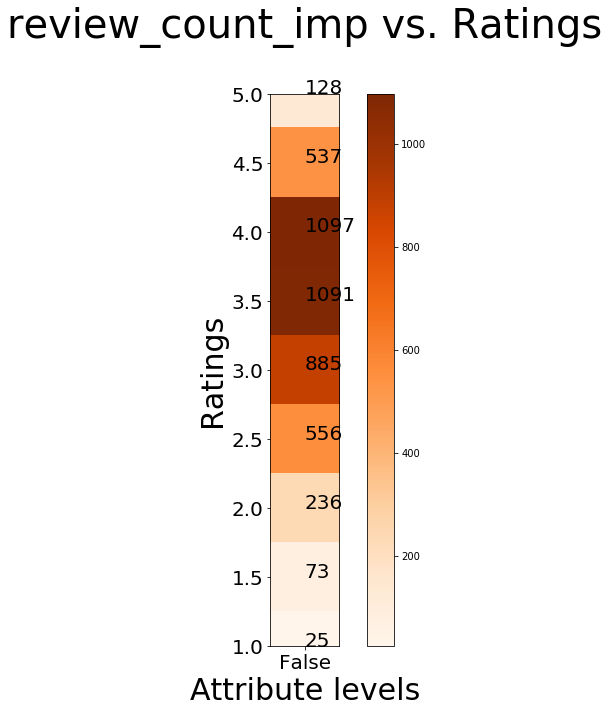

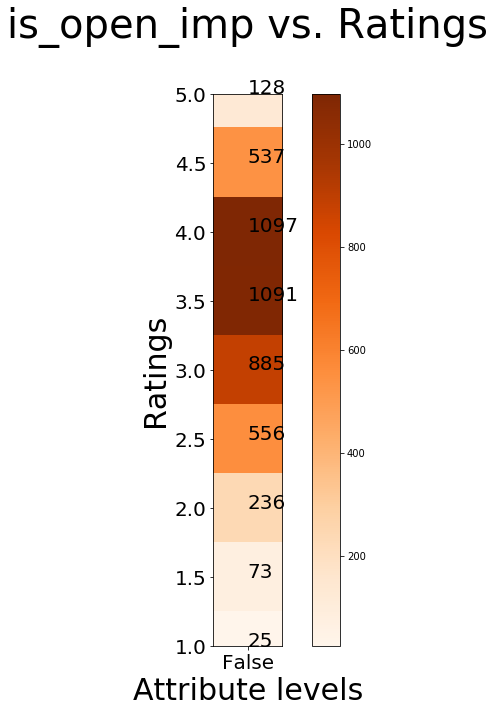

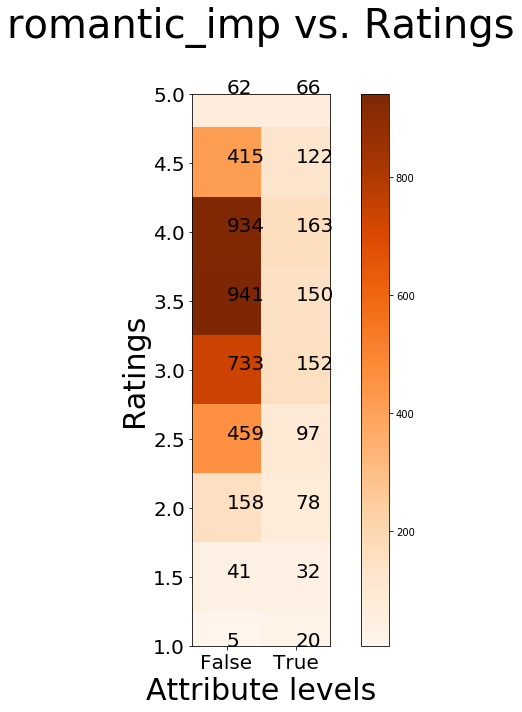

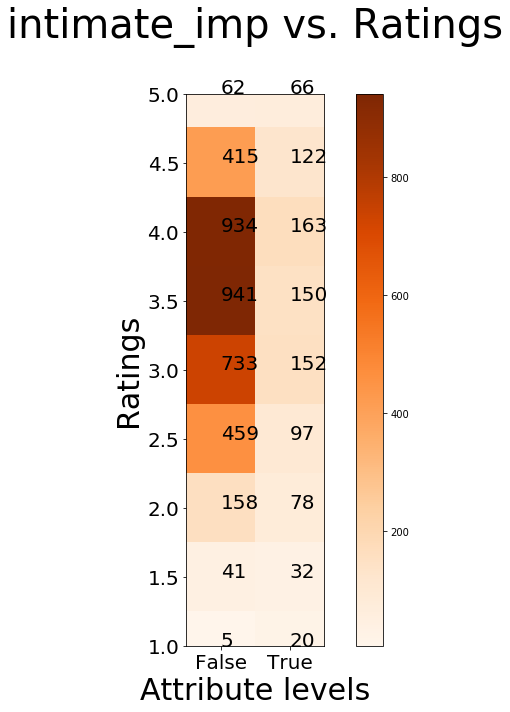

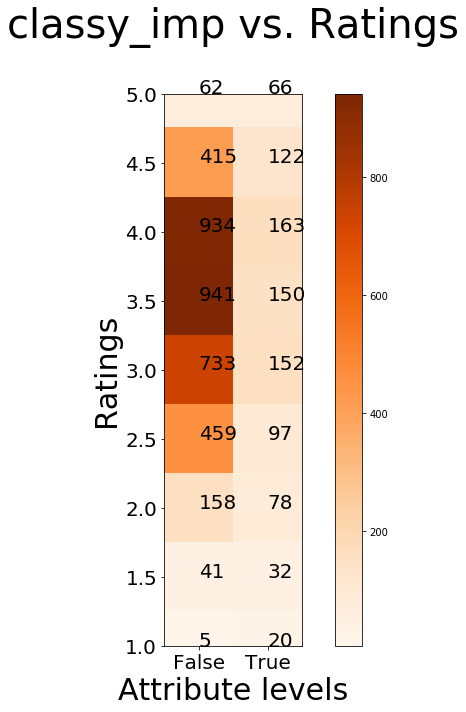

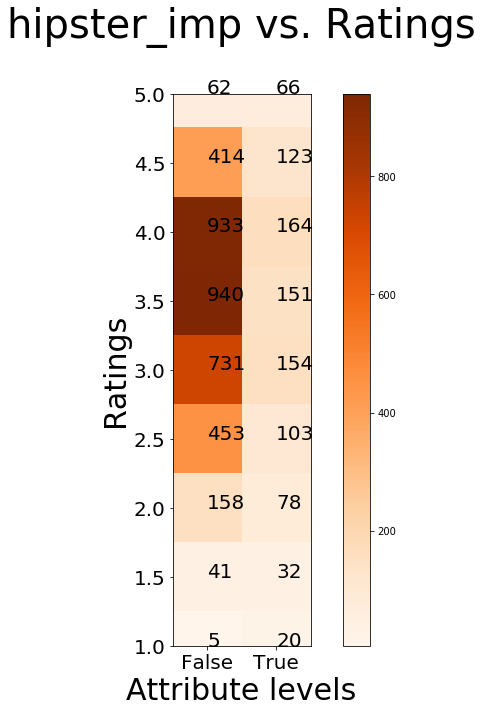

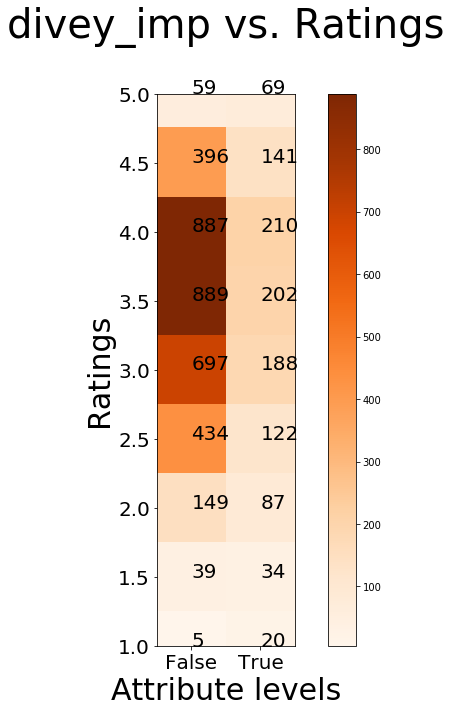

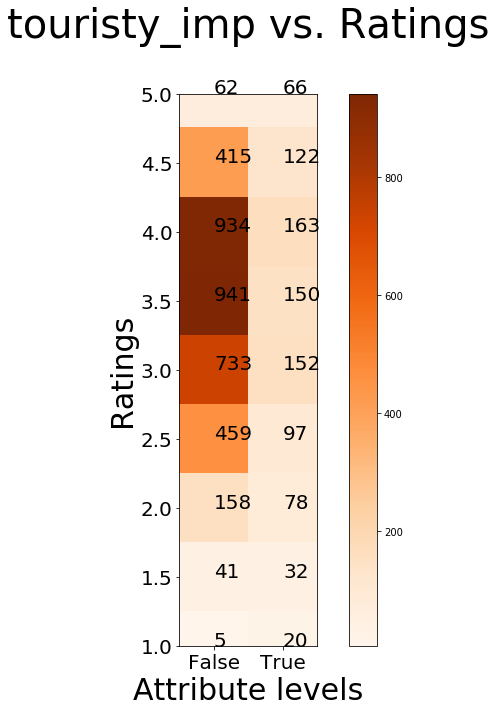

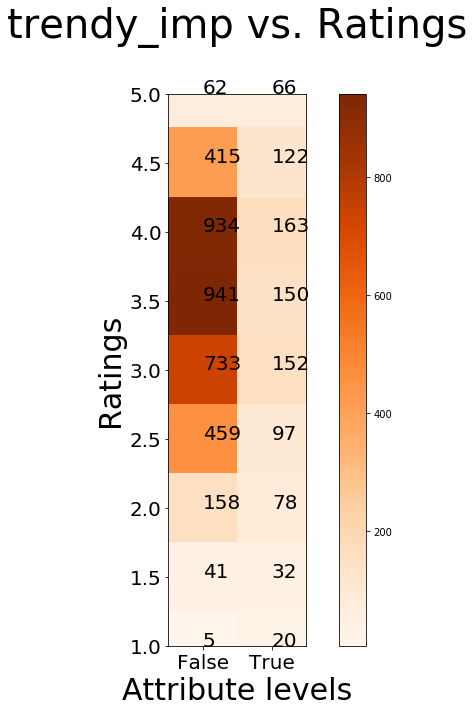

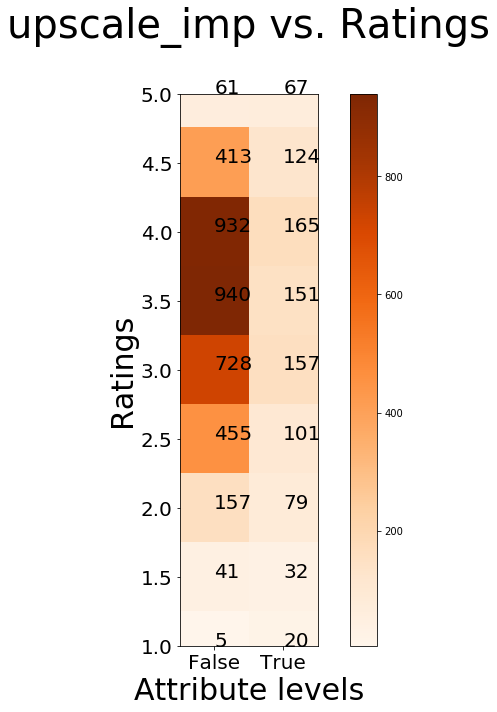

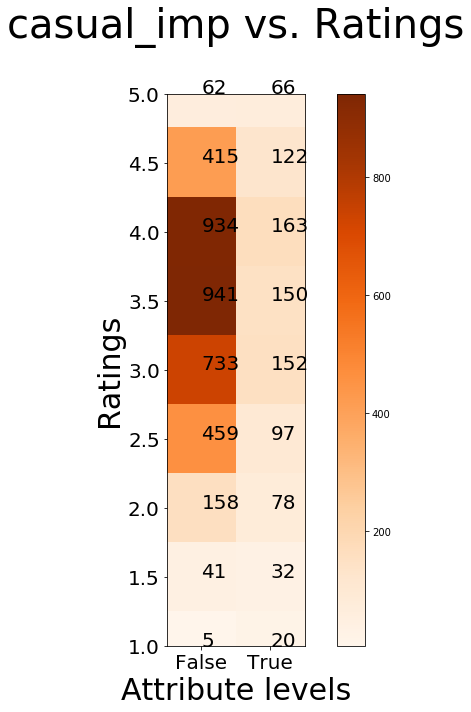

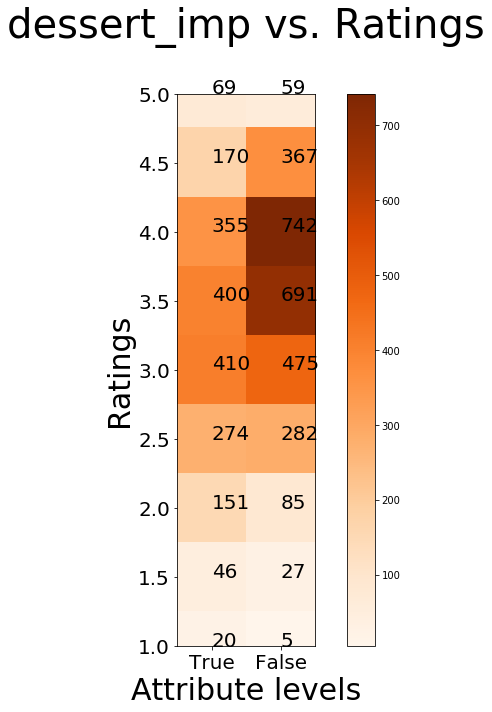

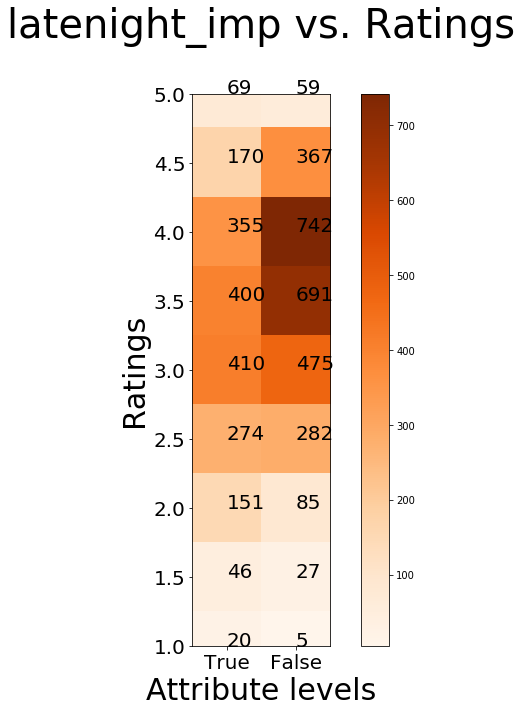

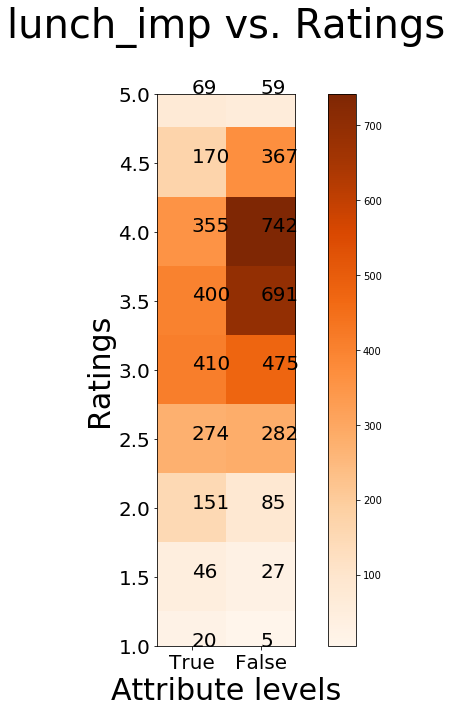

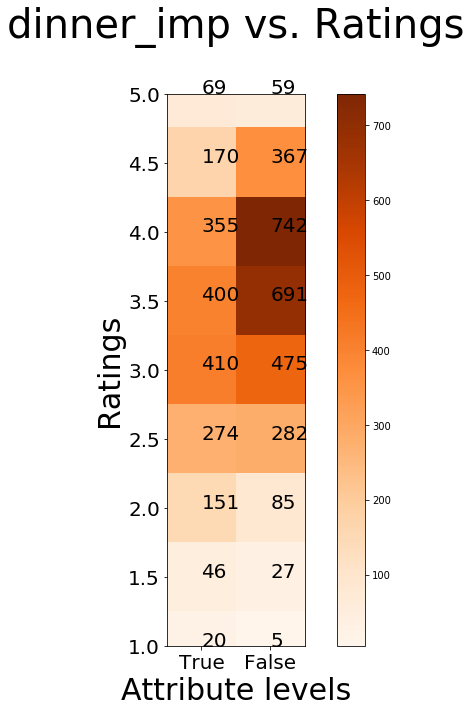

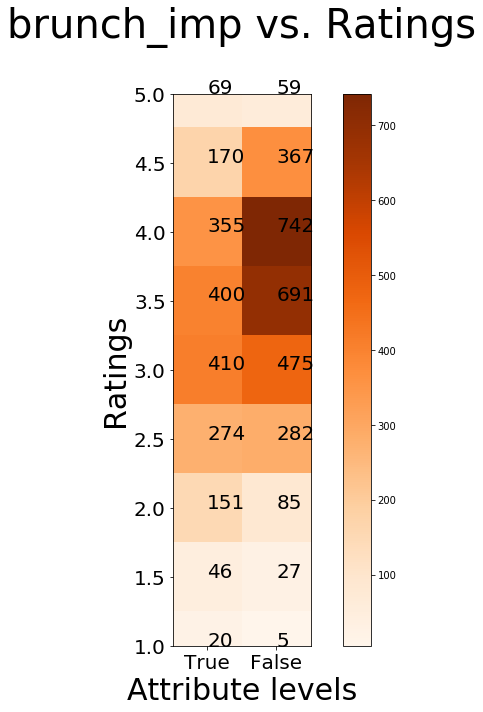

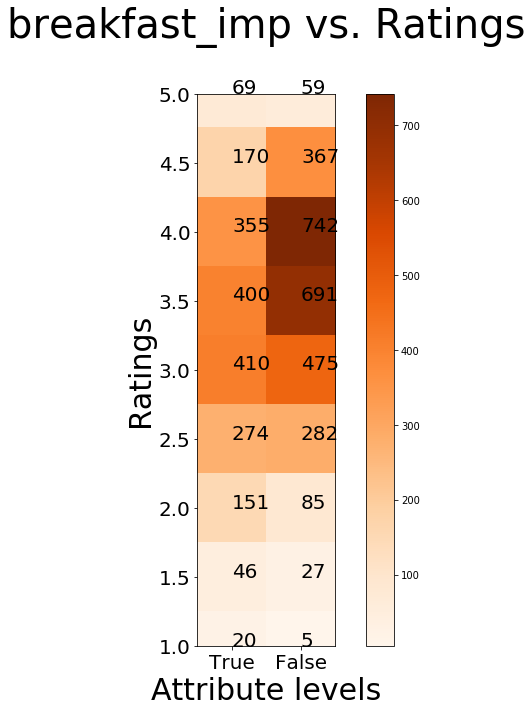

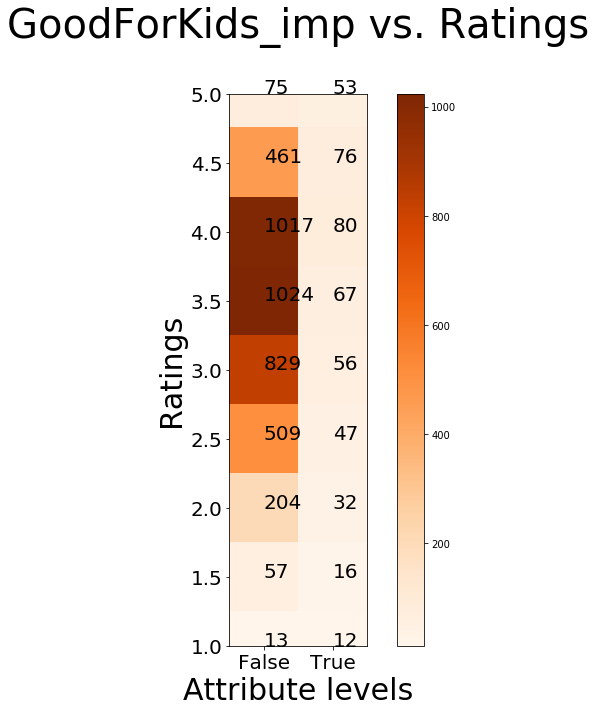

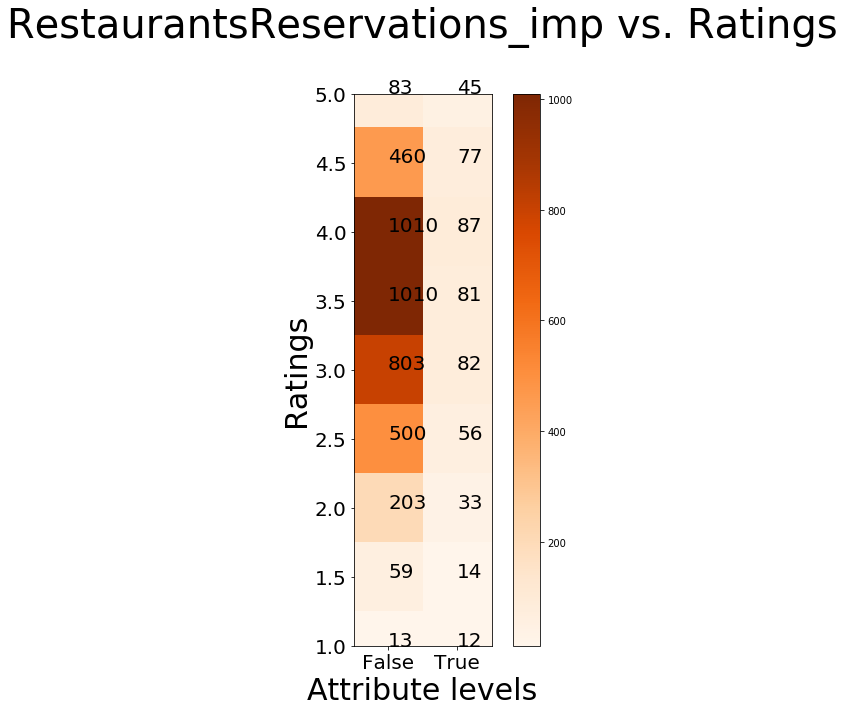

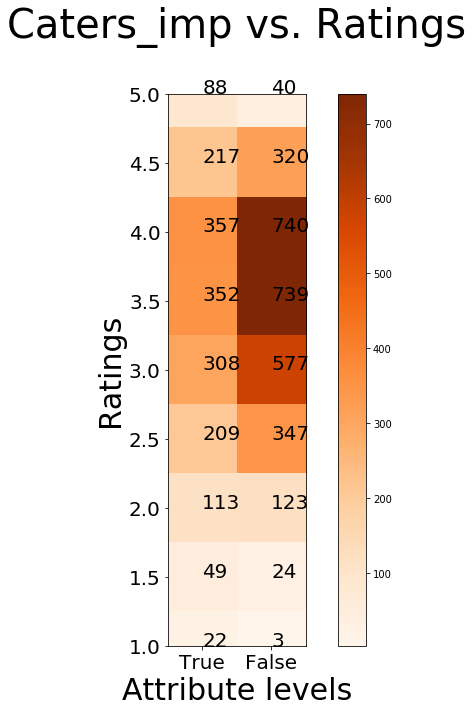

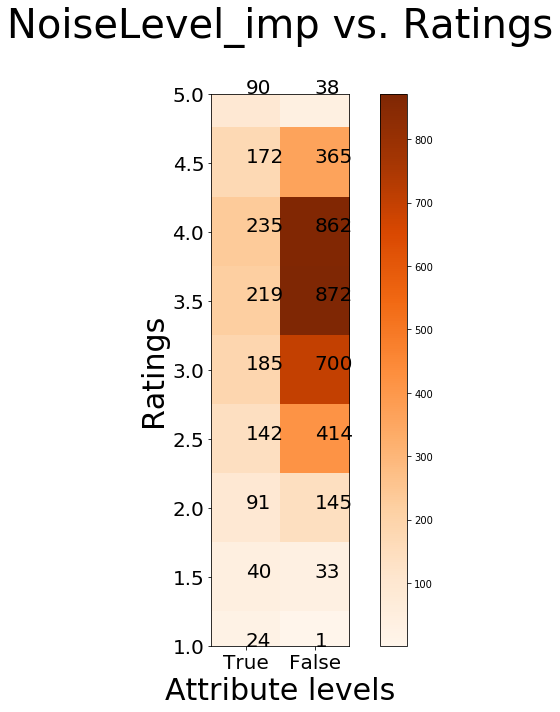

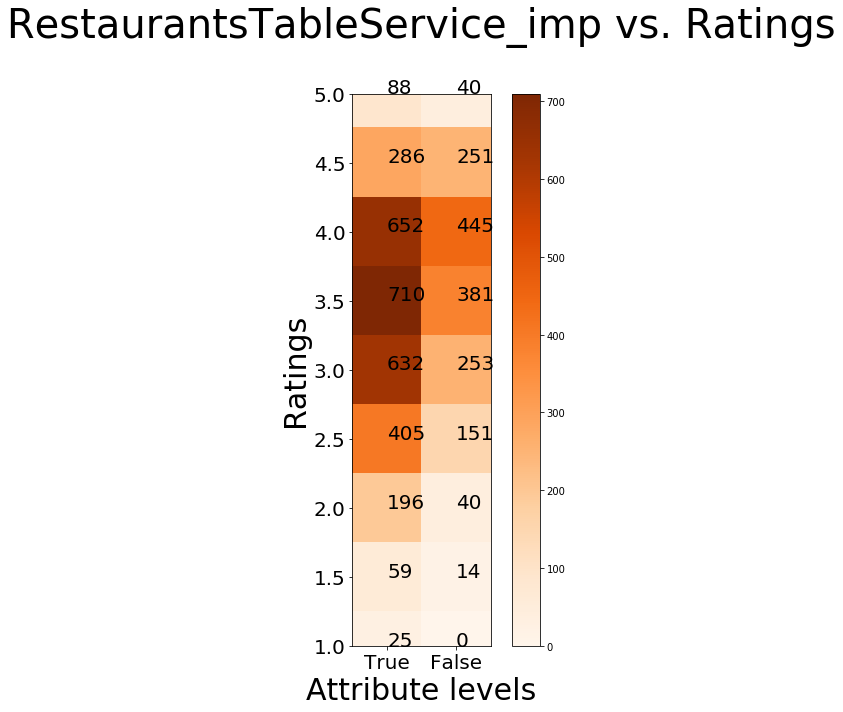

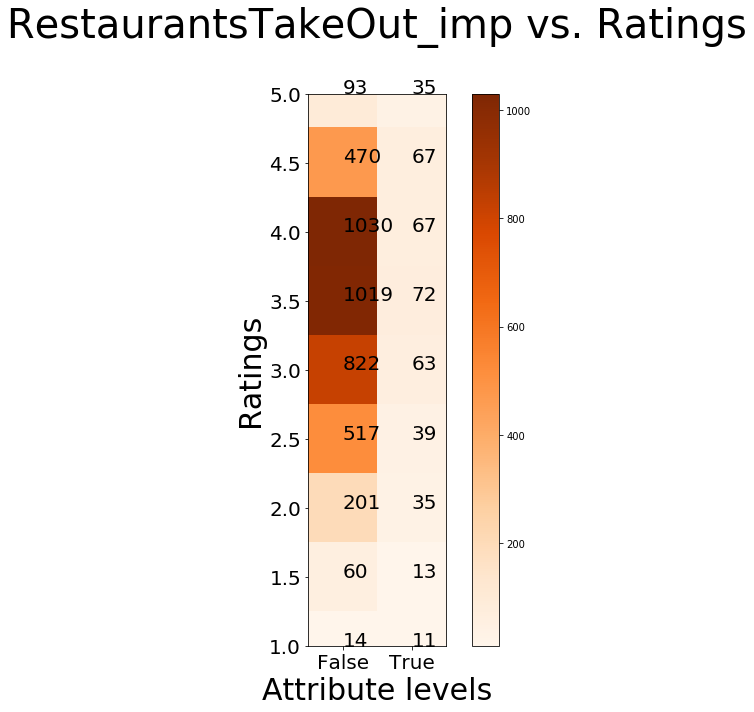

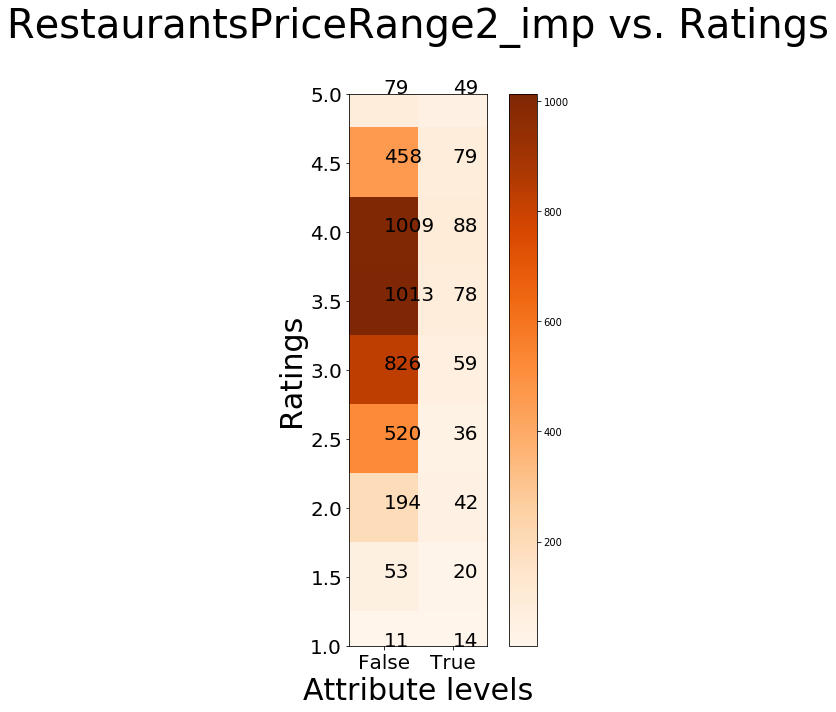

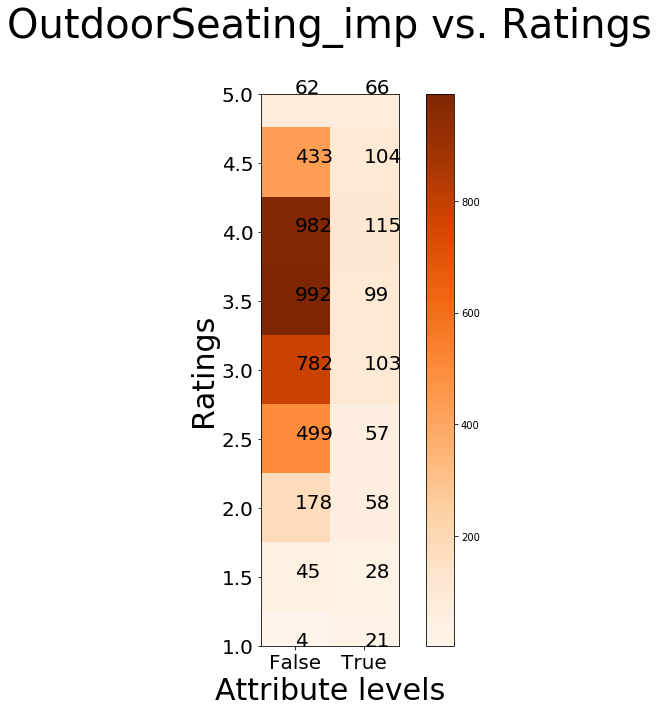

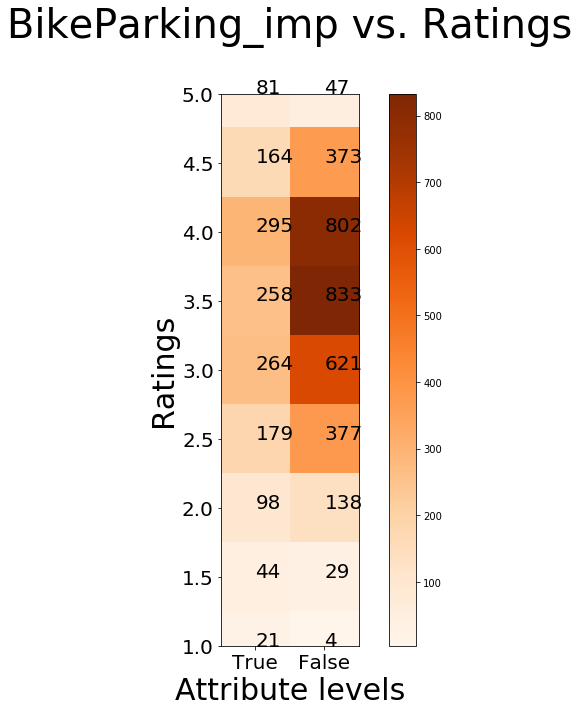

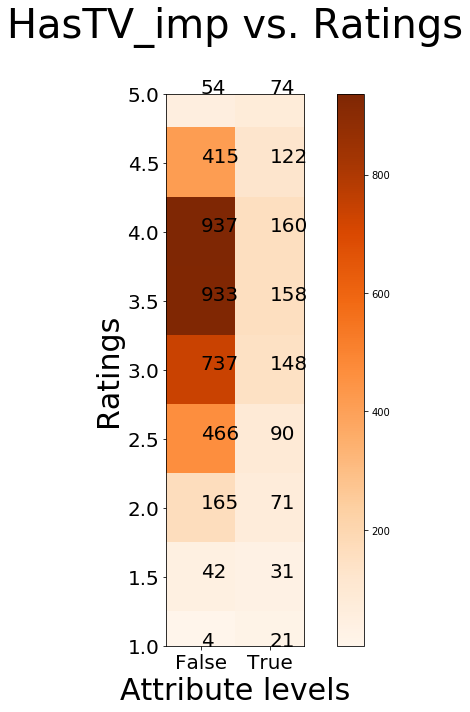

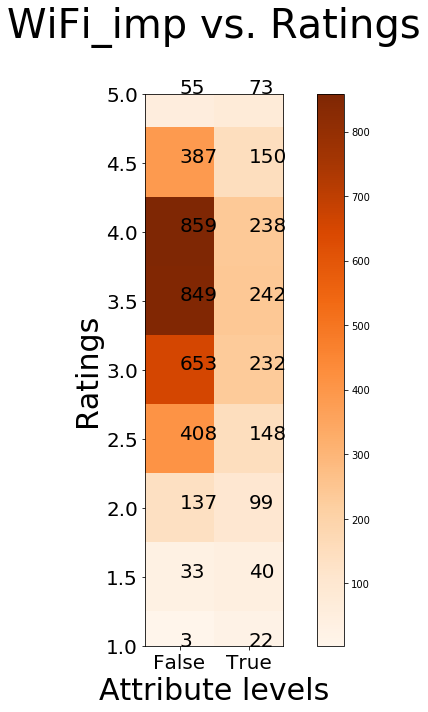

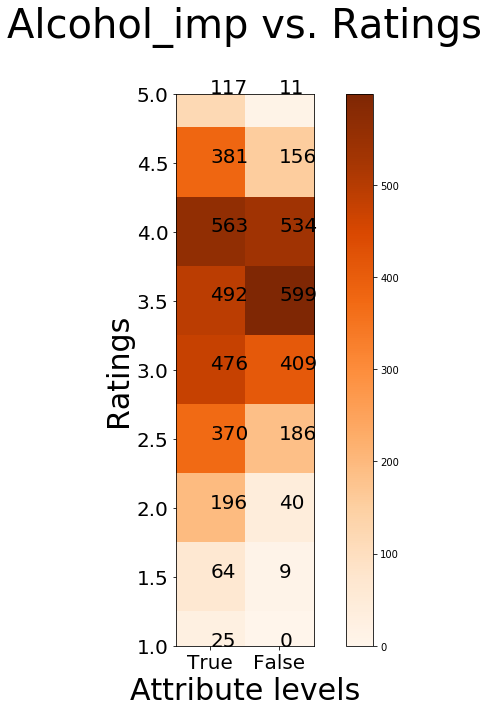

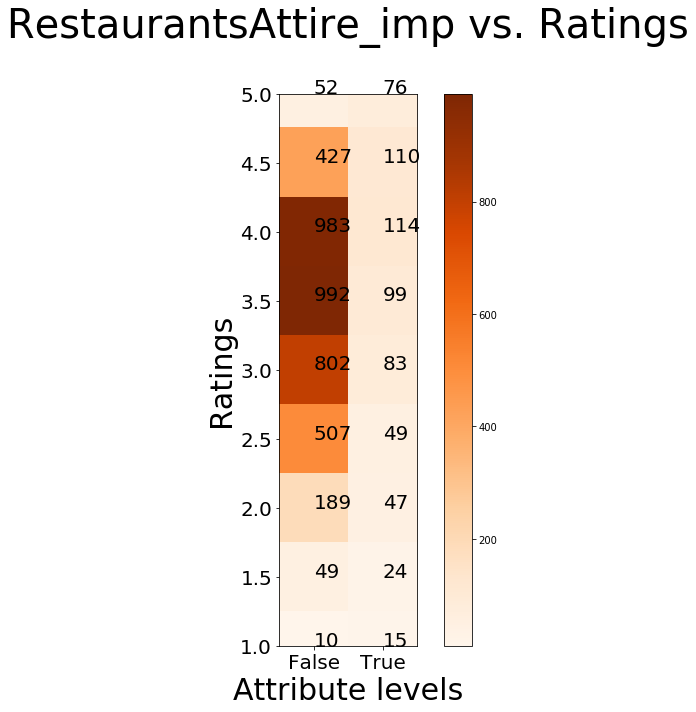

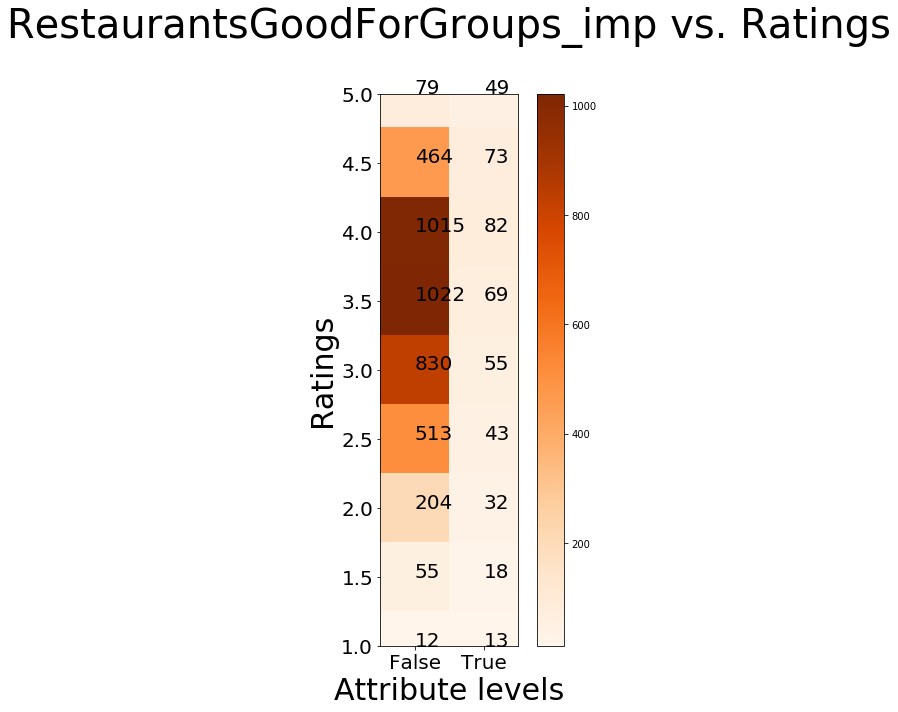

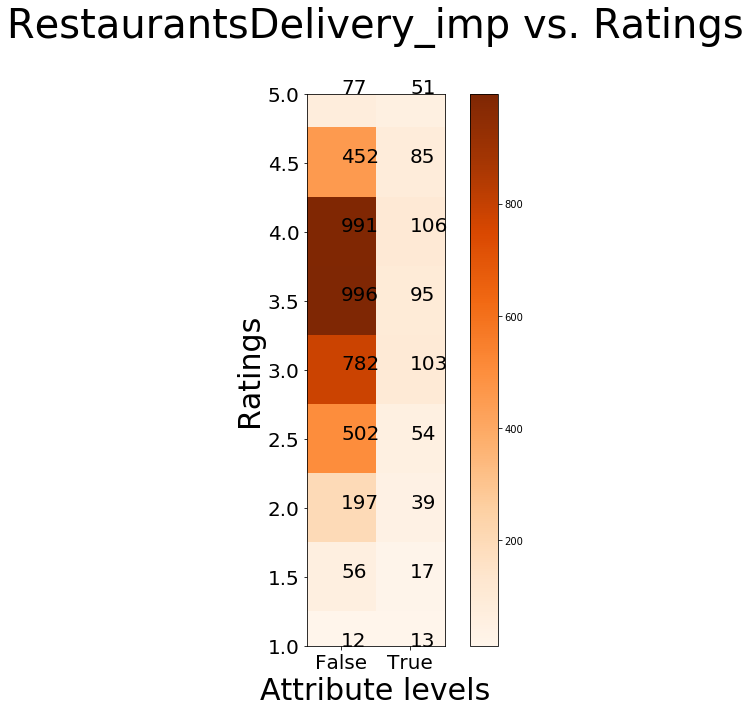

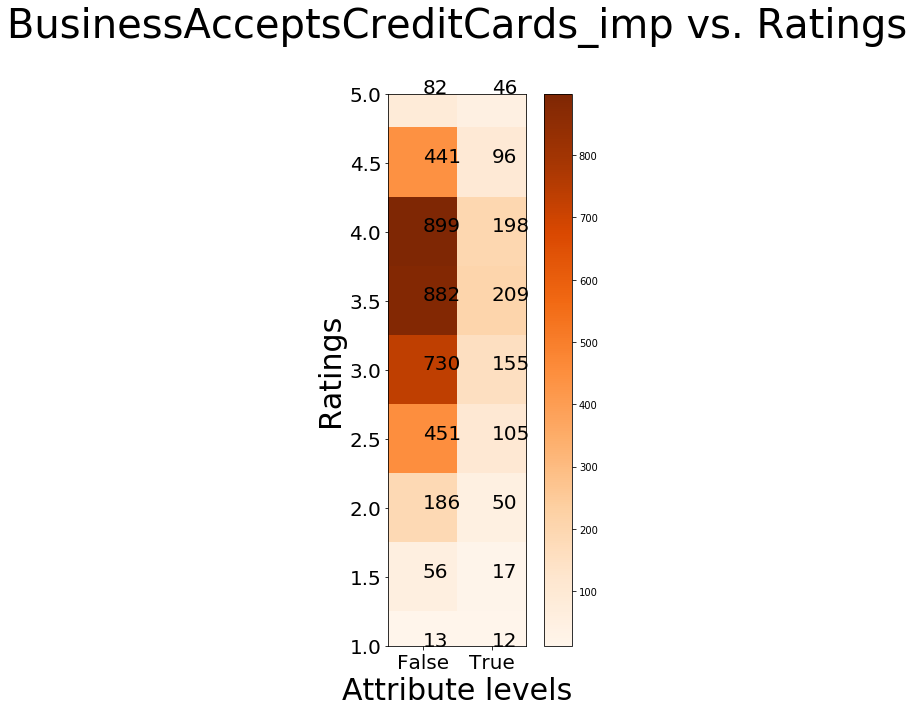

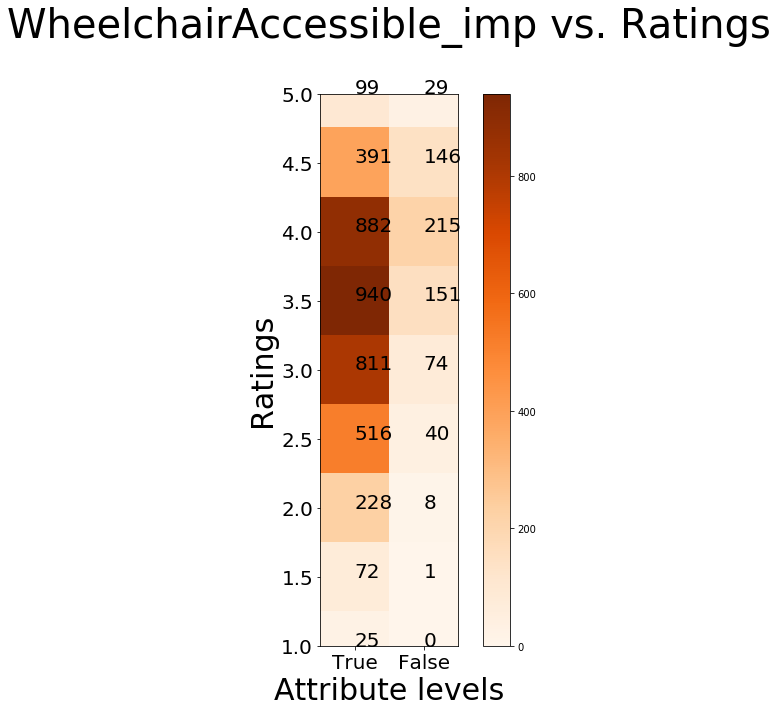

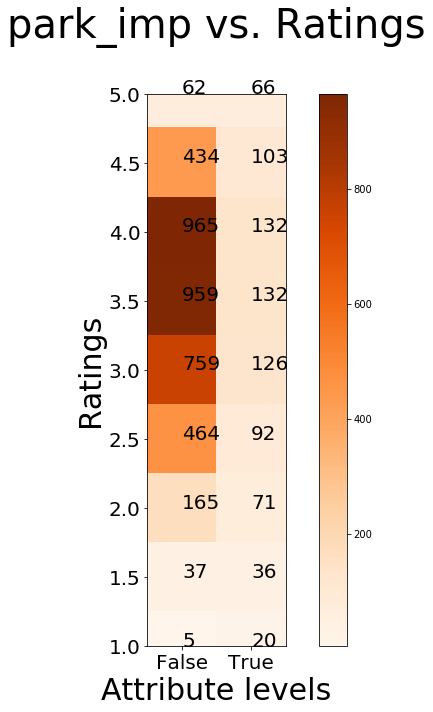

In [0]:
save_plot_matrixs(att, columns = att.columns[8:])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


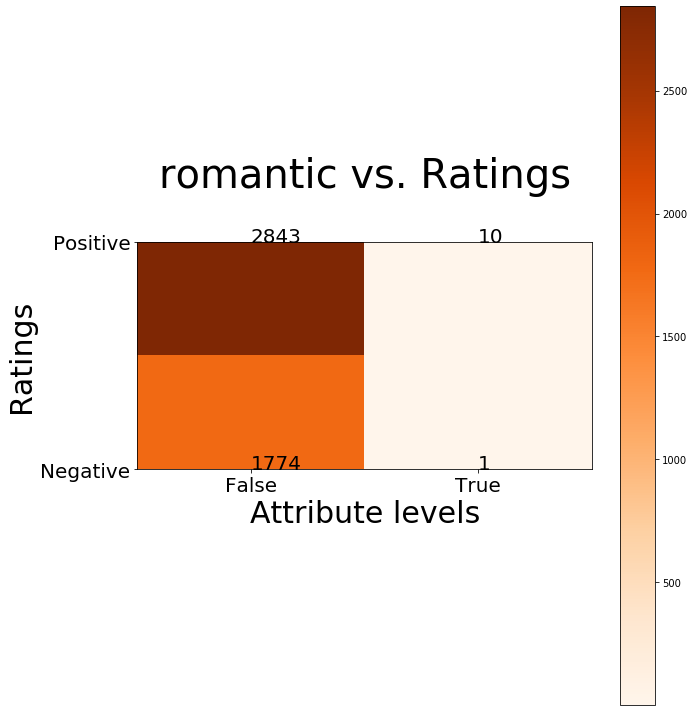

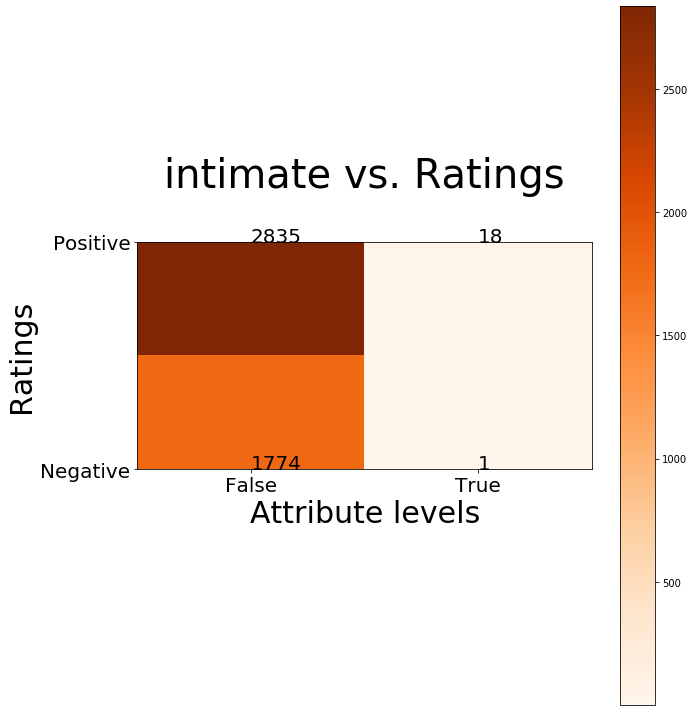

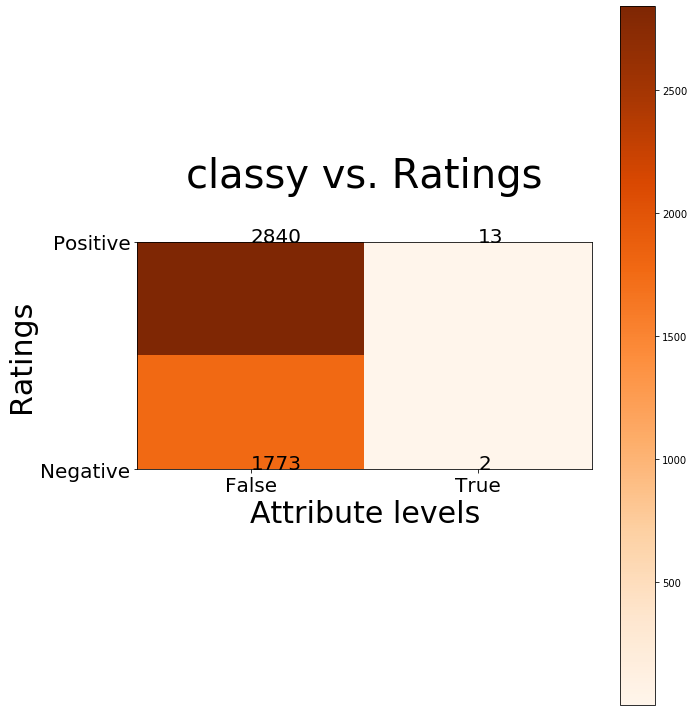

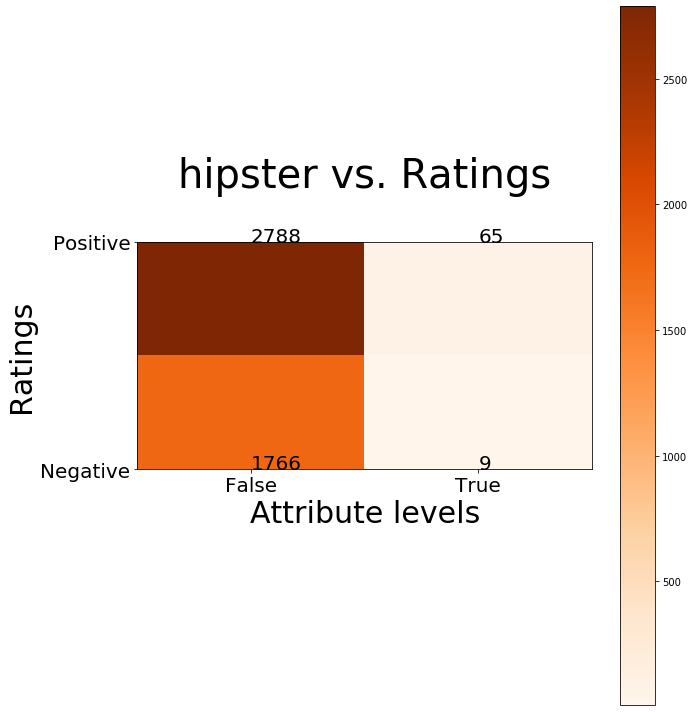

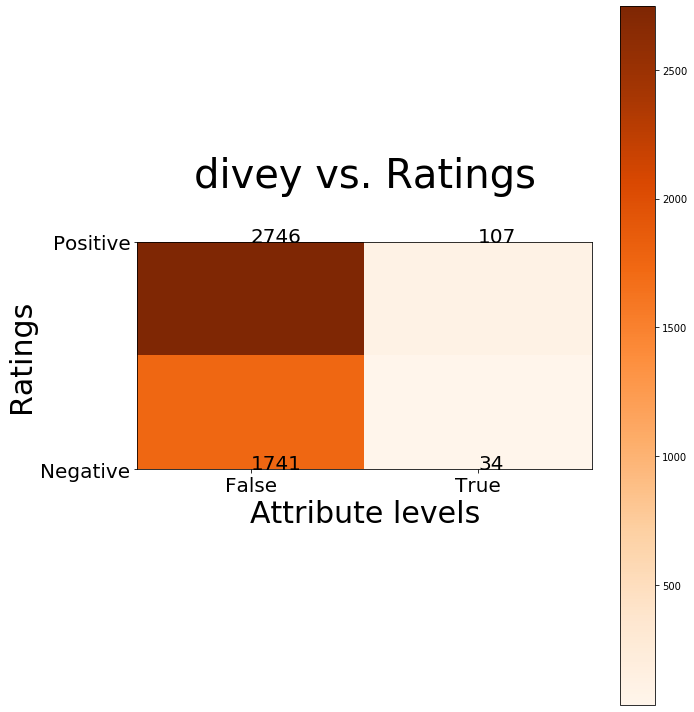

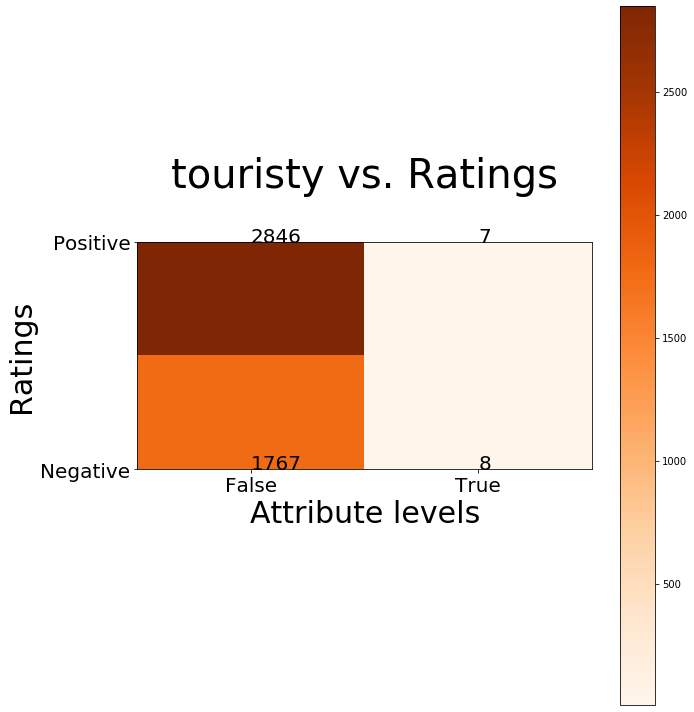

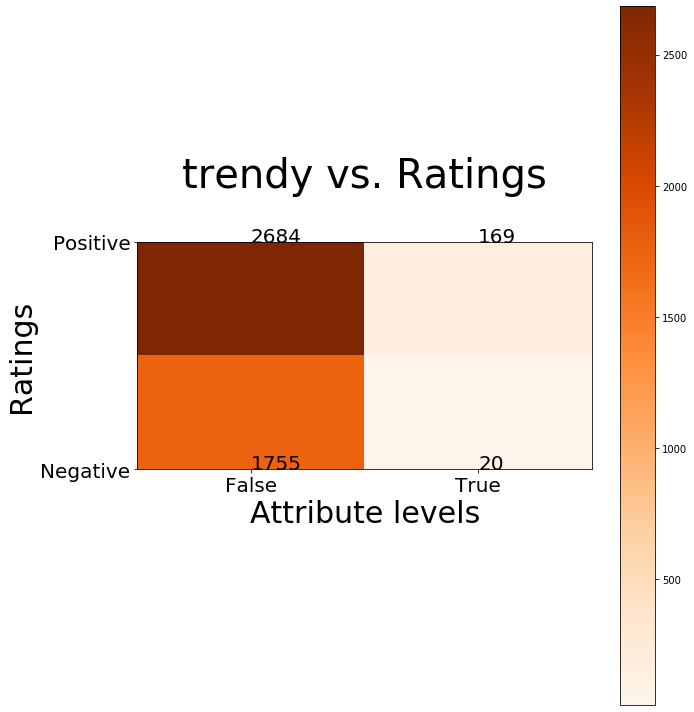

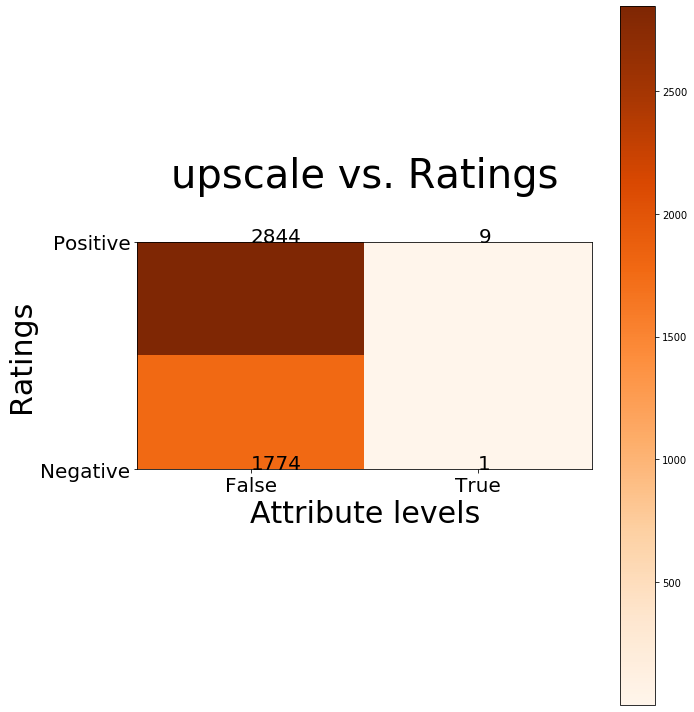

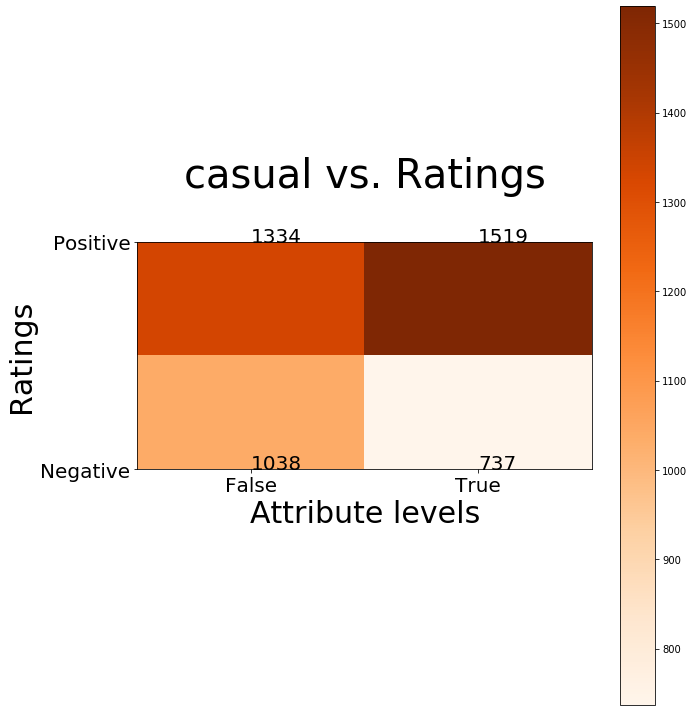

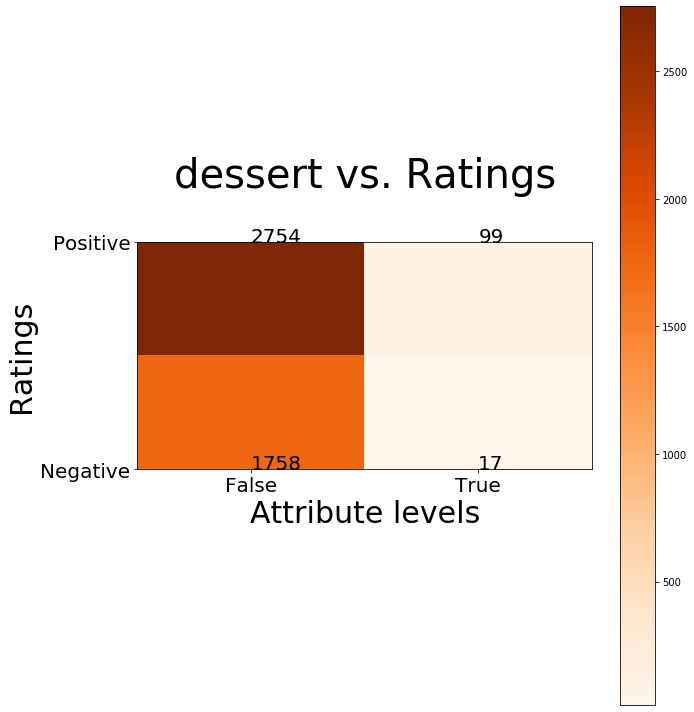

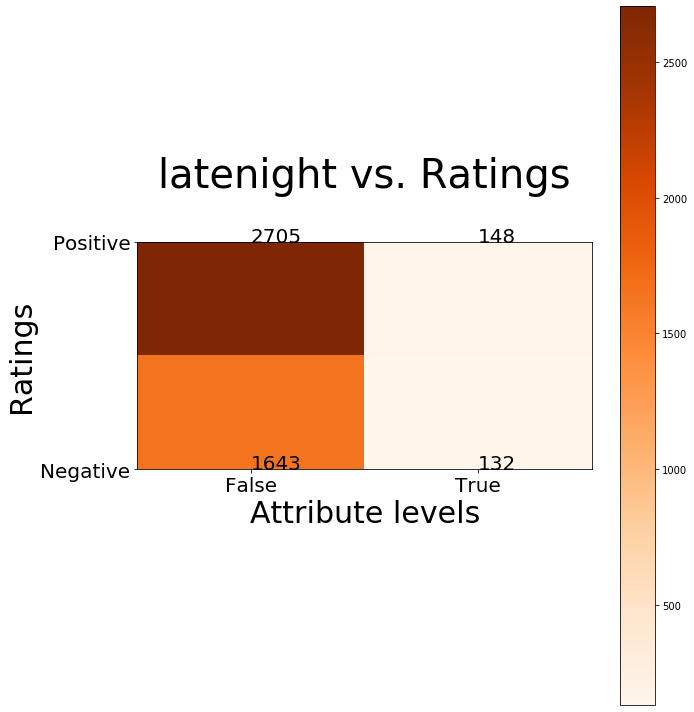

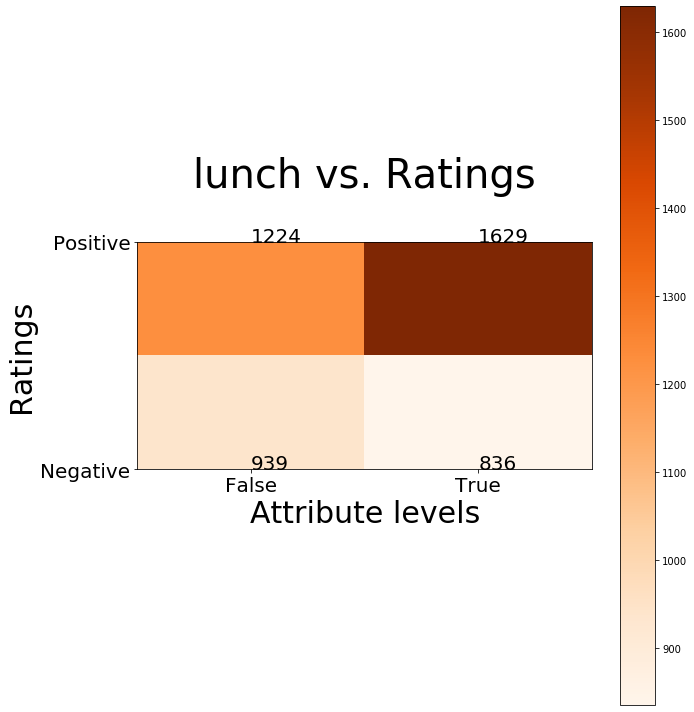

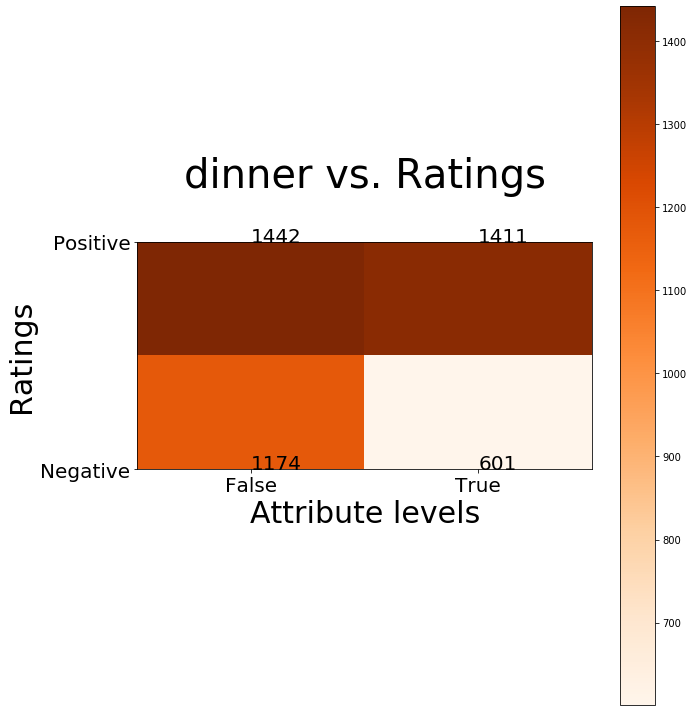

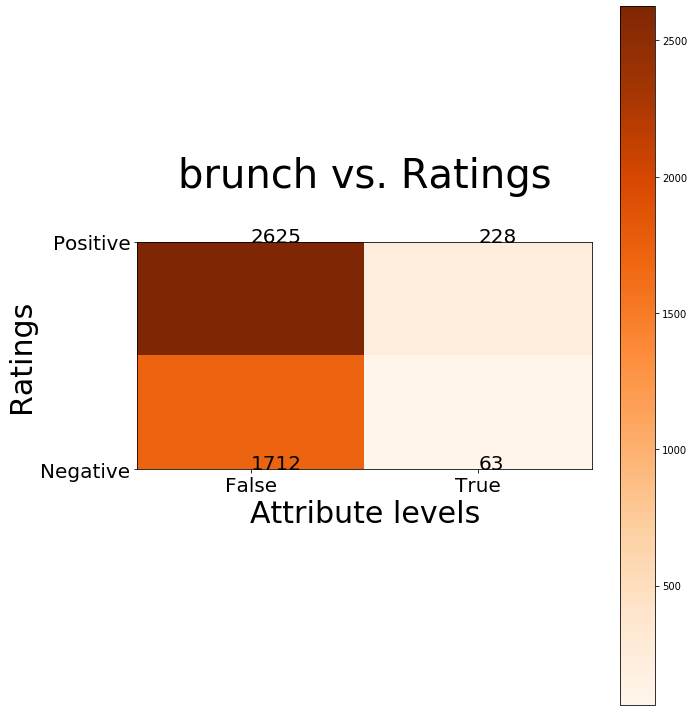

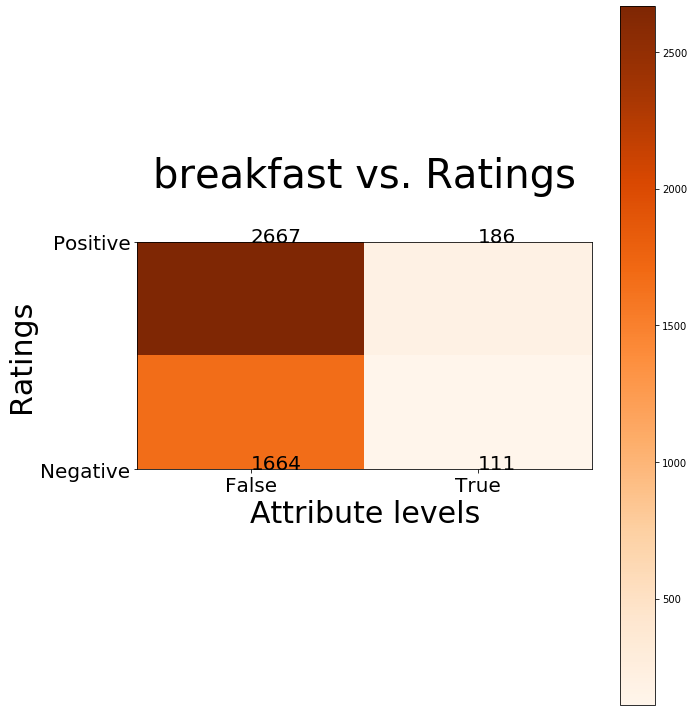

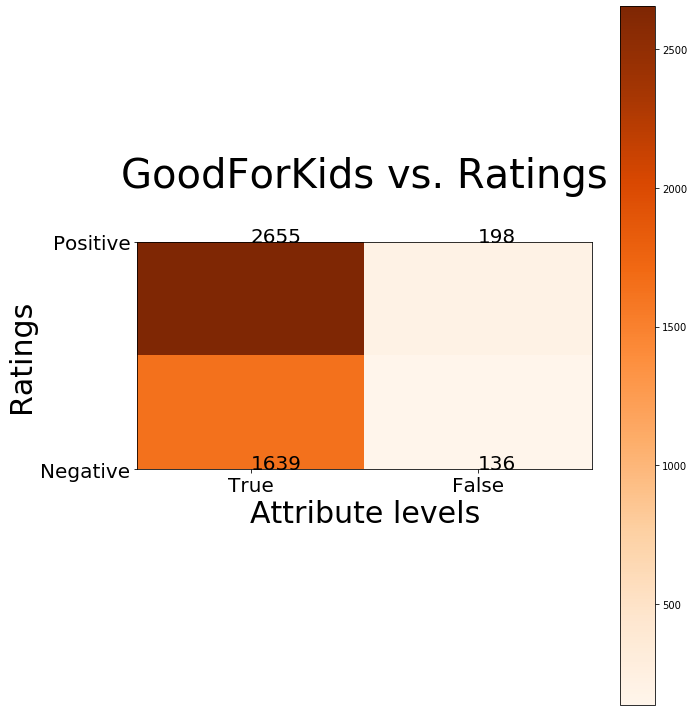

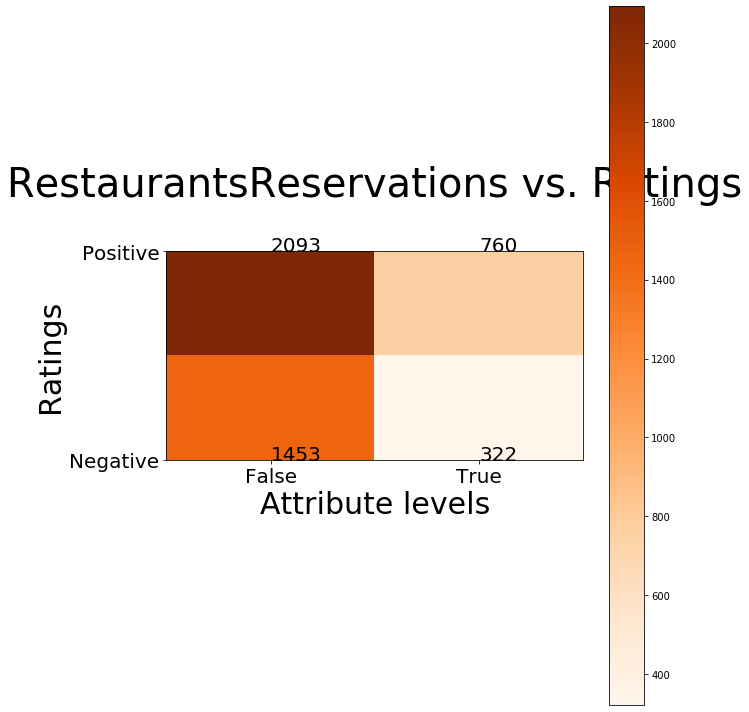

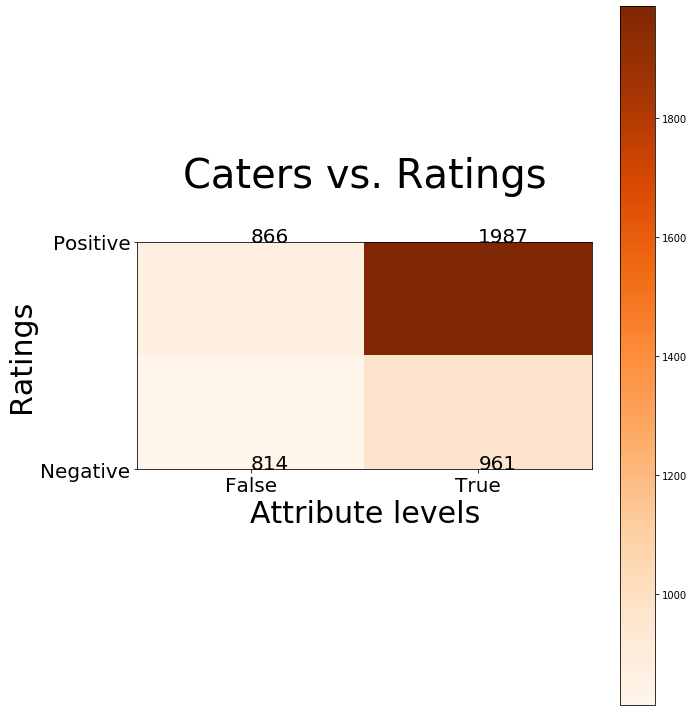

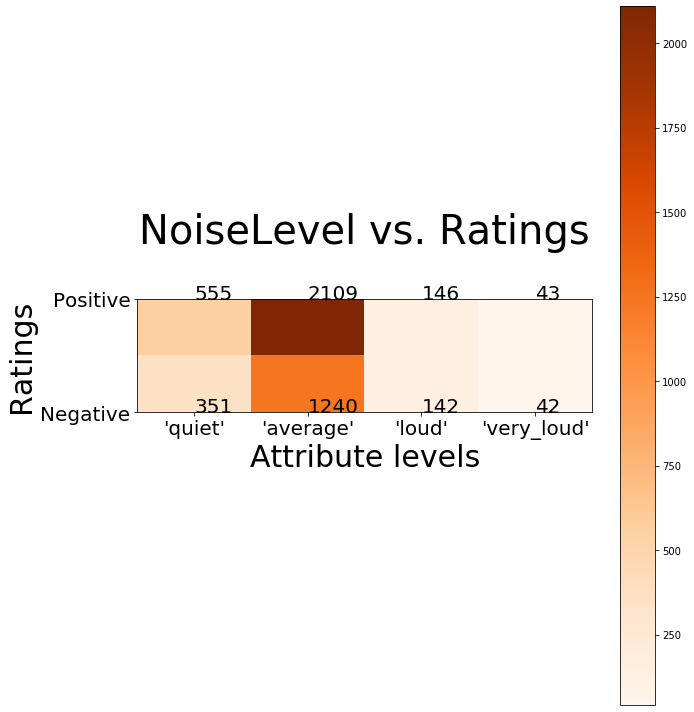

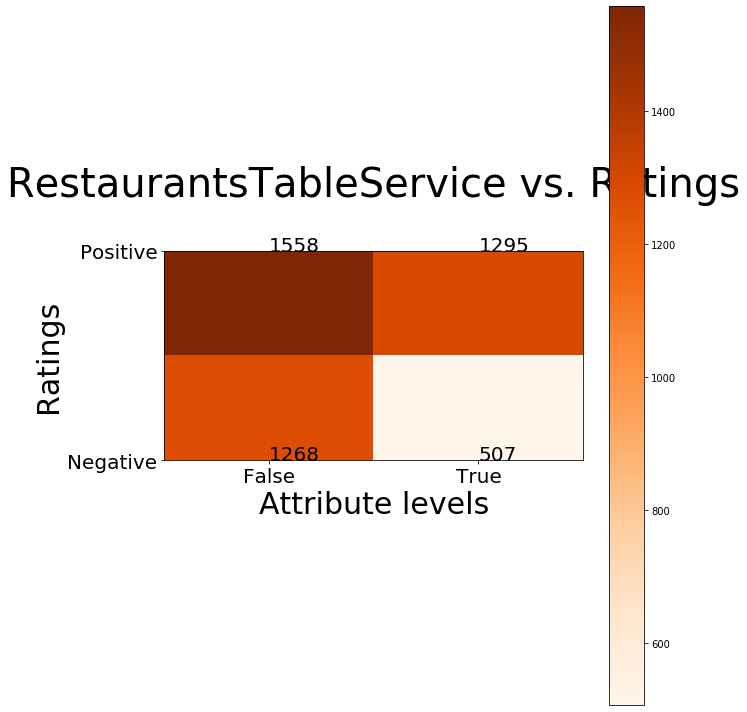

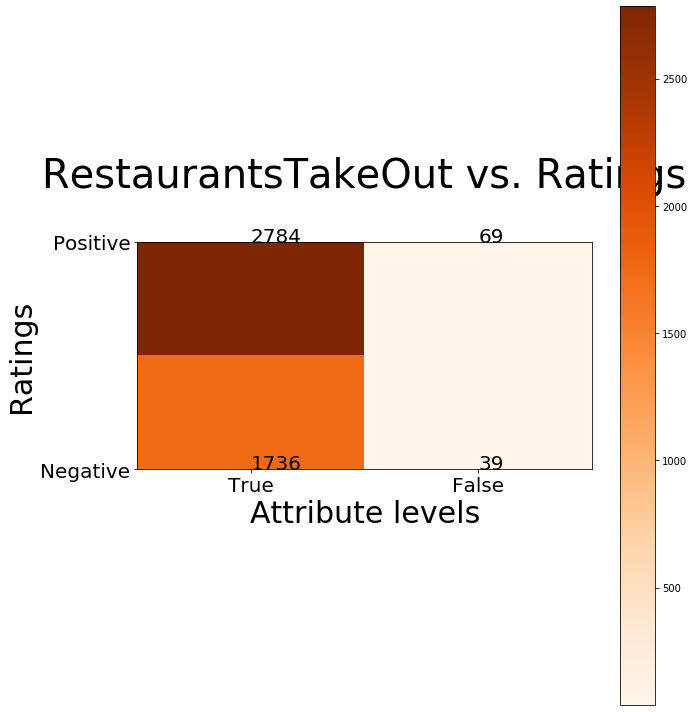

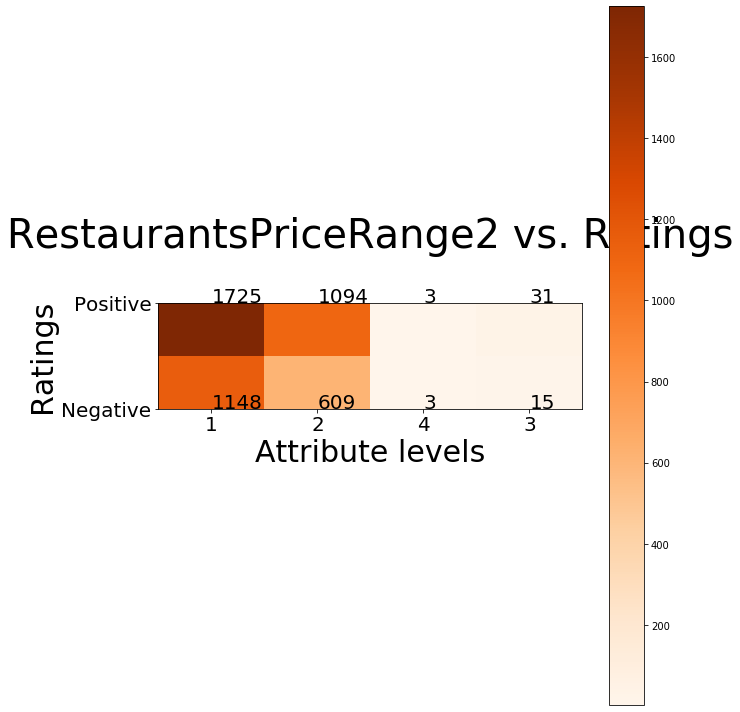

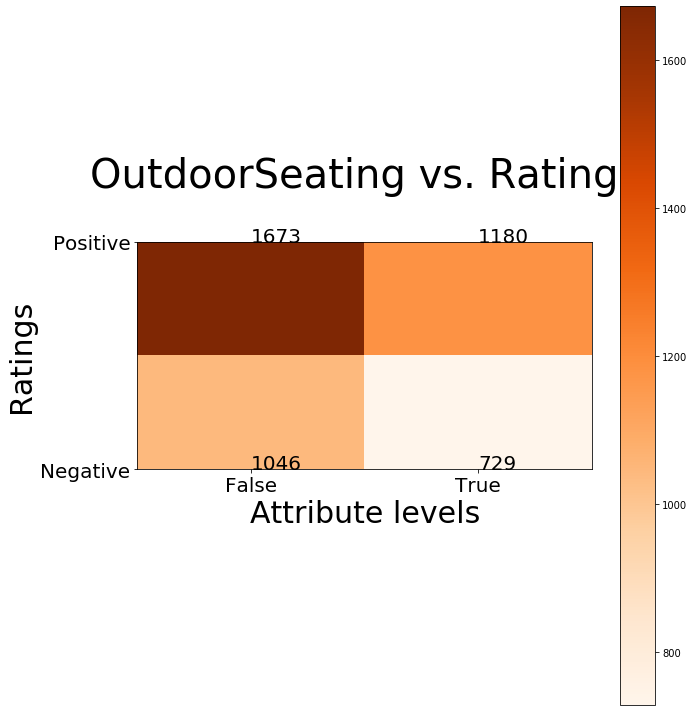

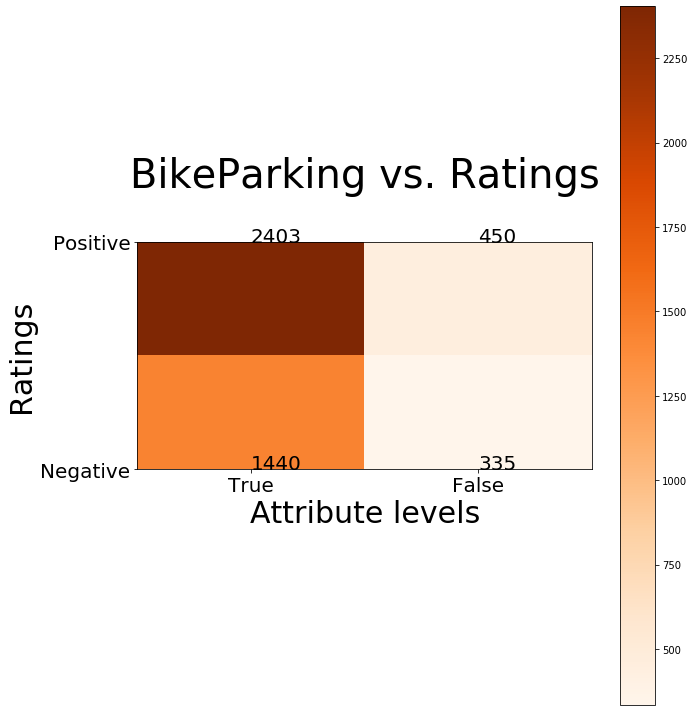

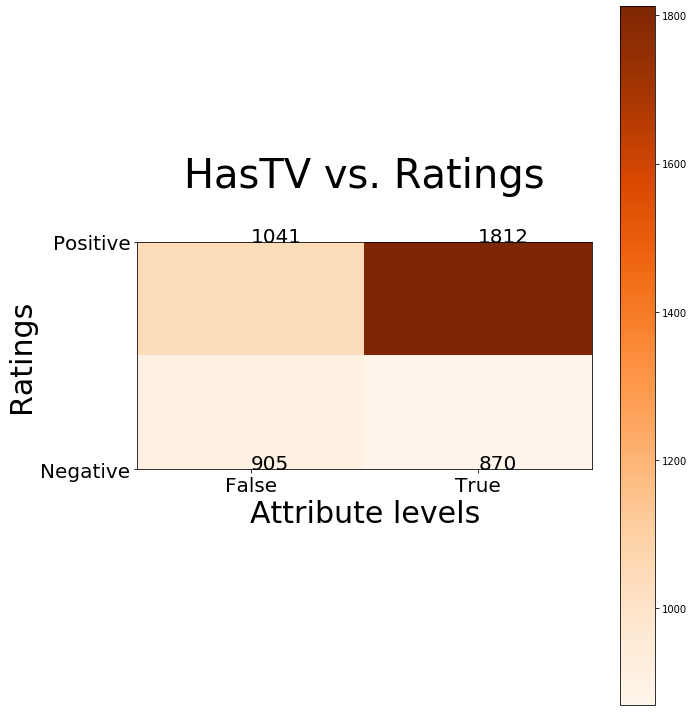

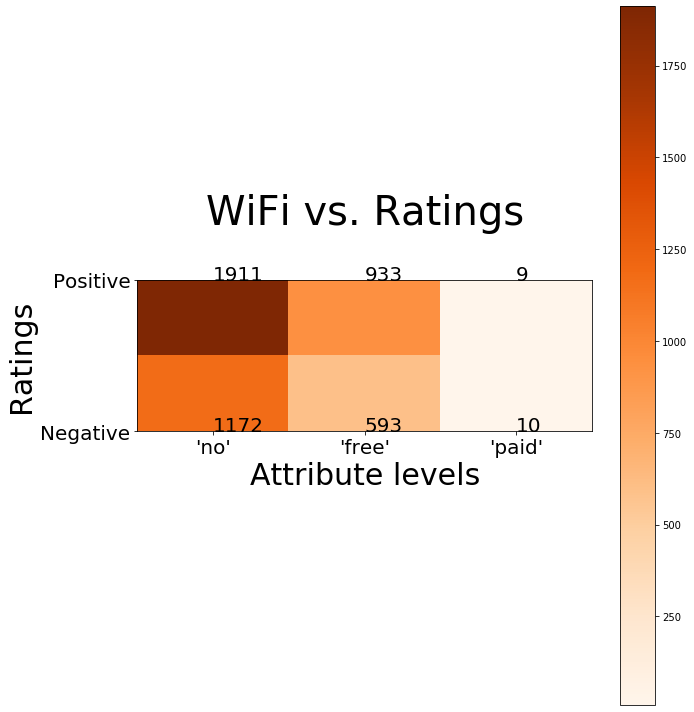

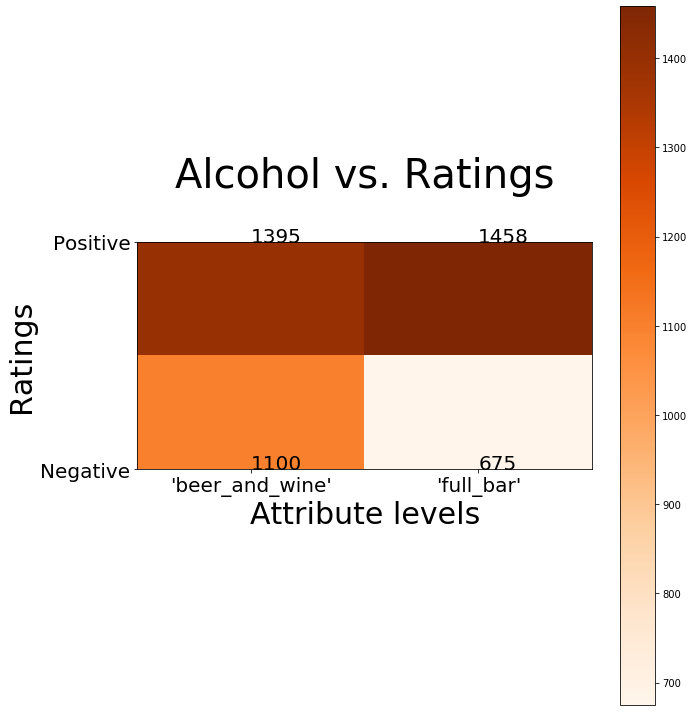

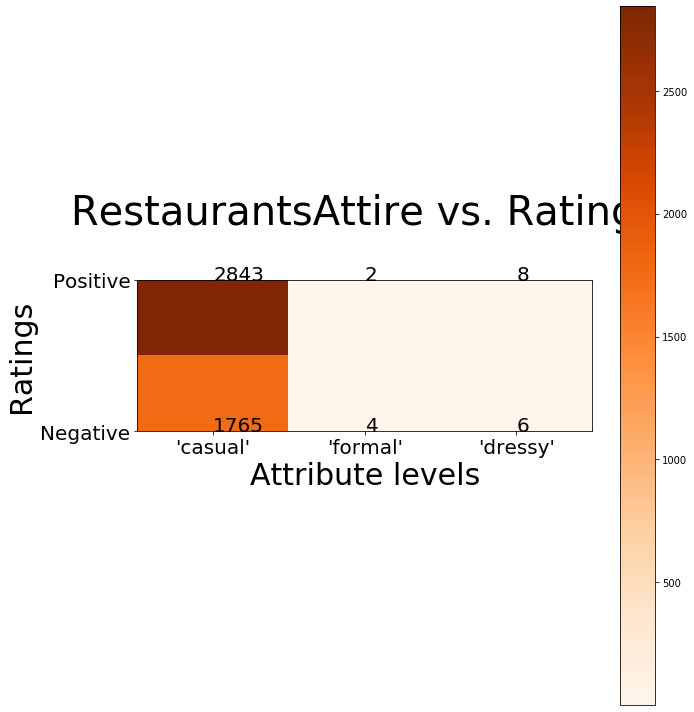

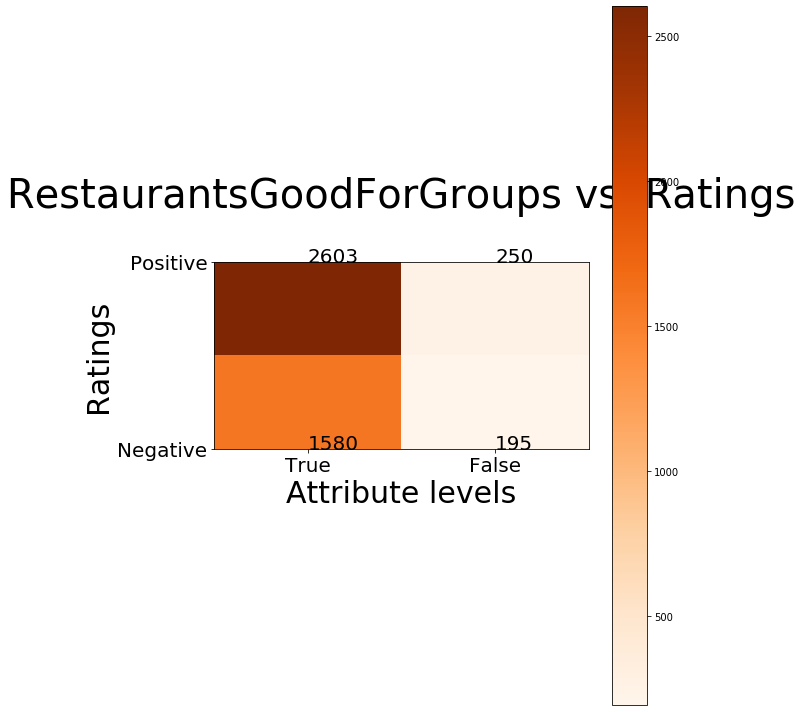

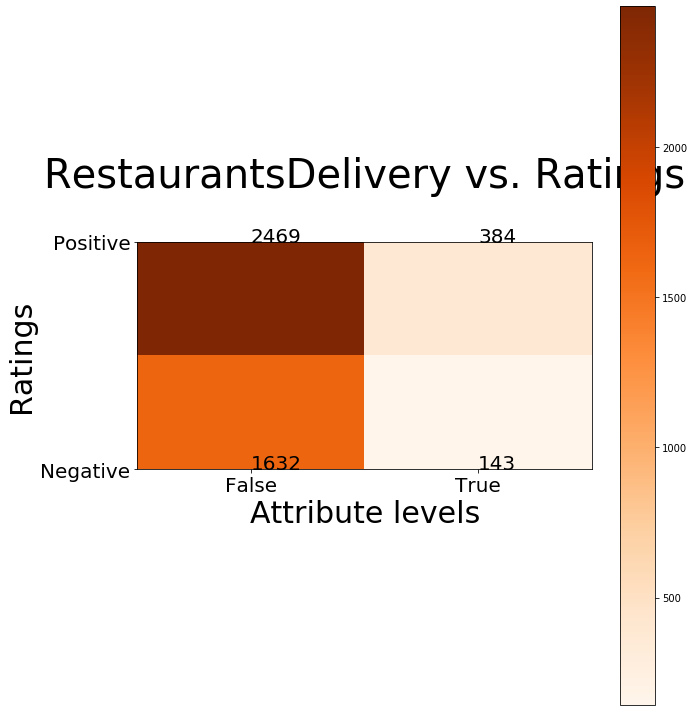

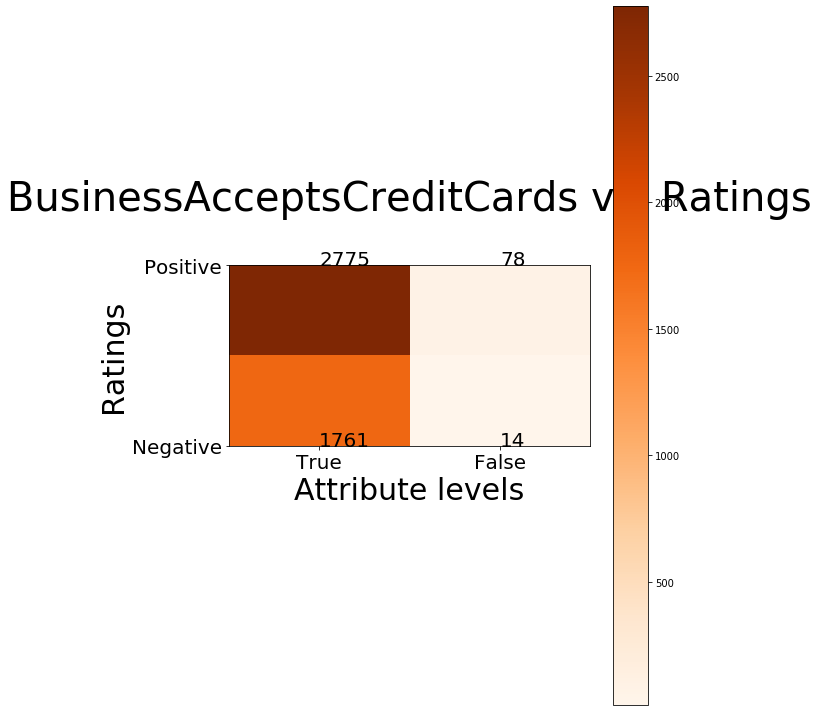

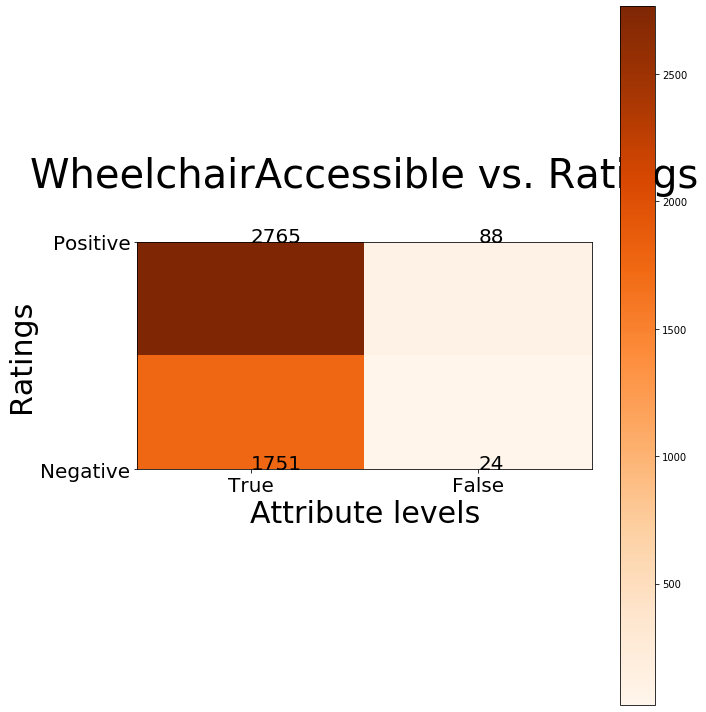

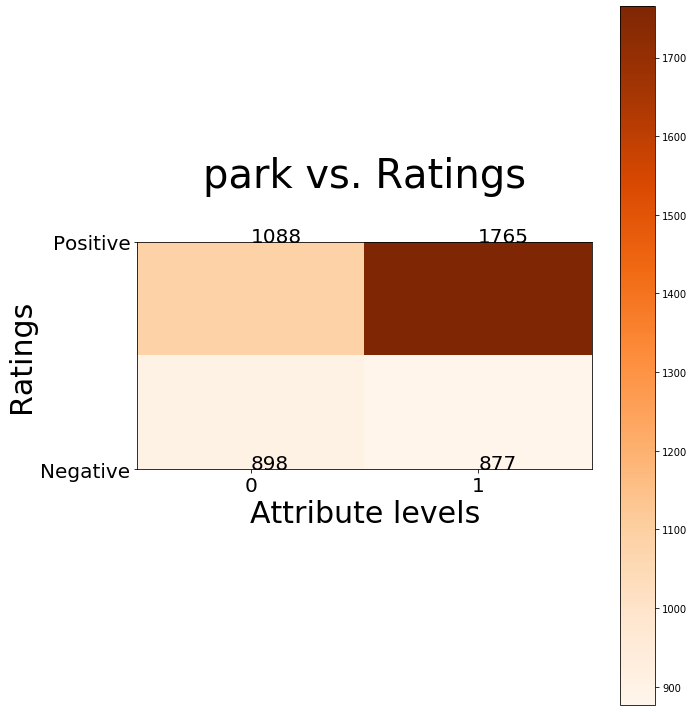

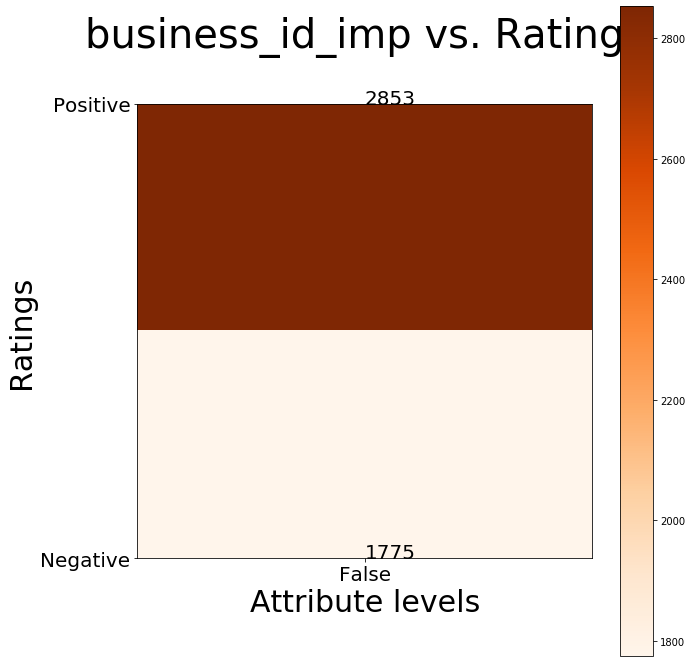

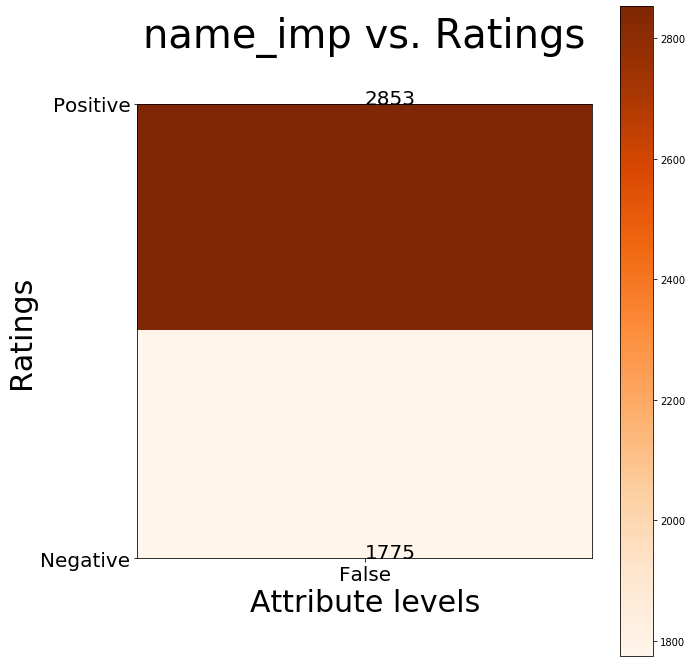

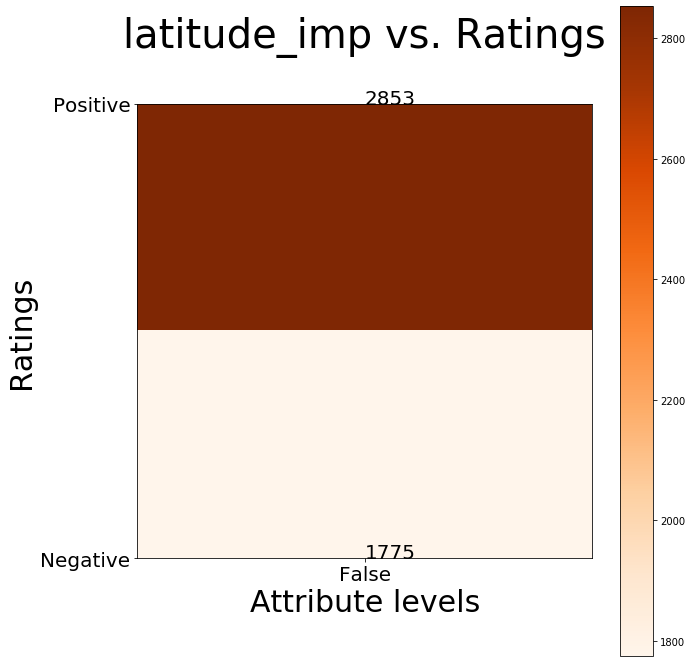

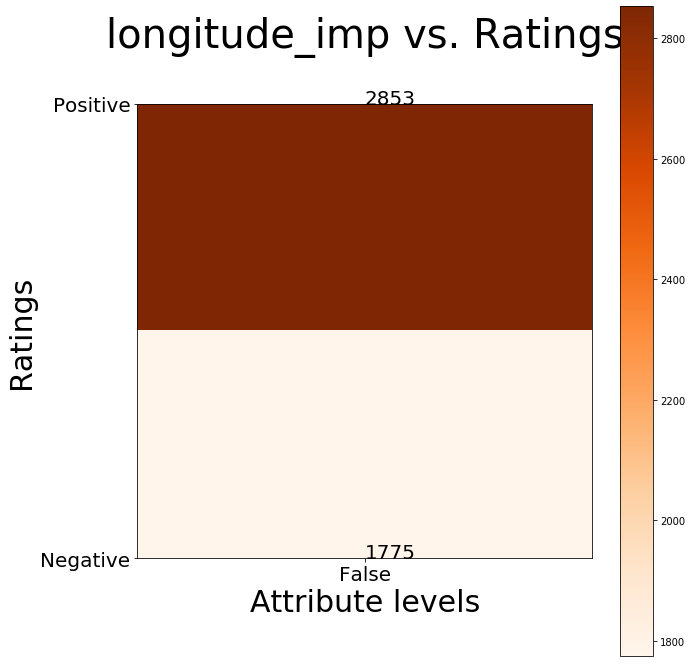

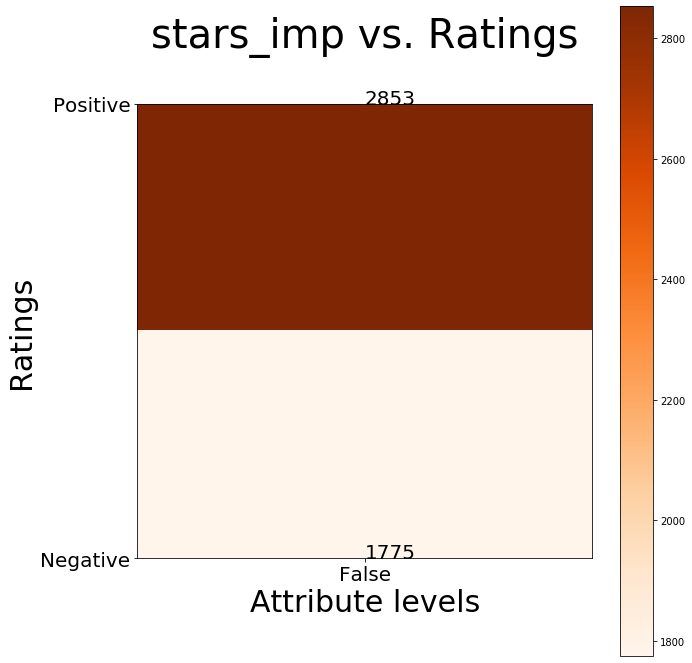

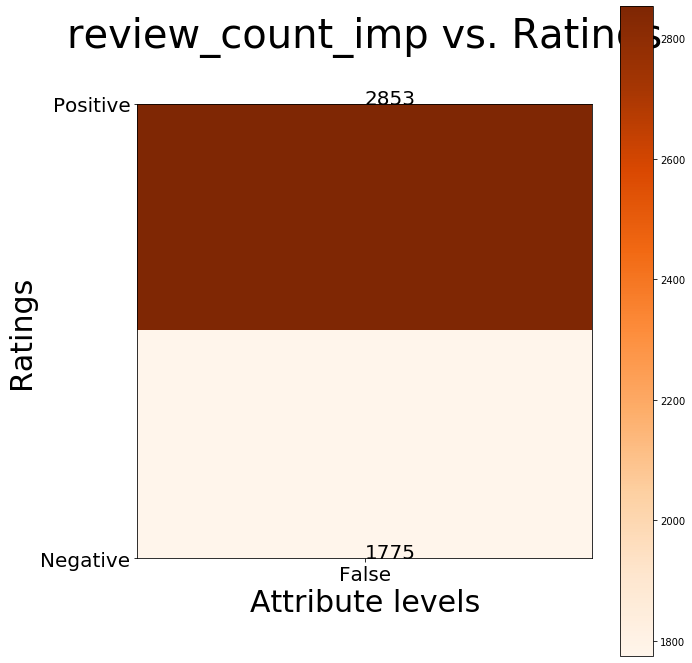

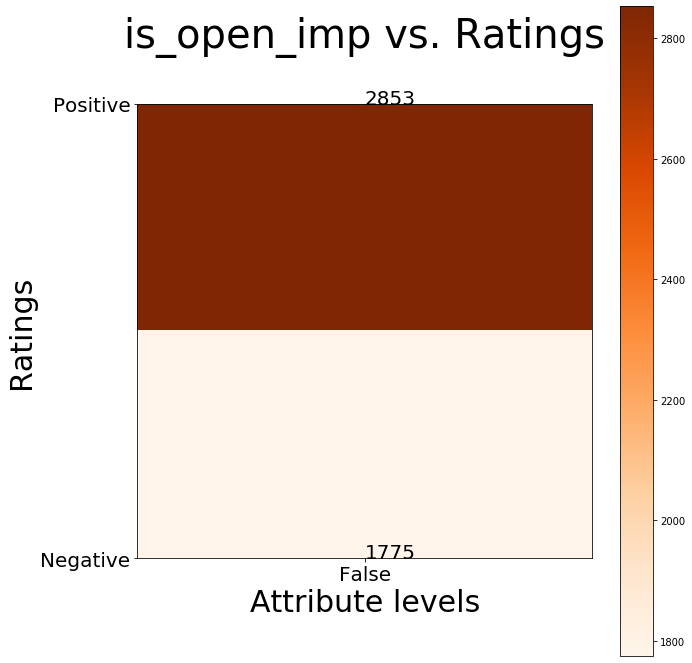

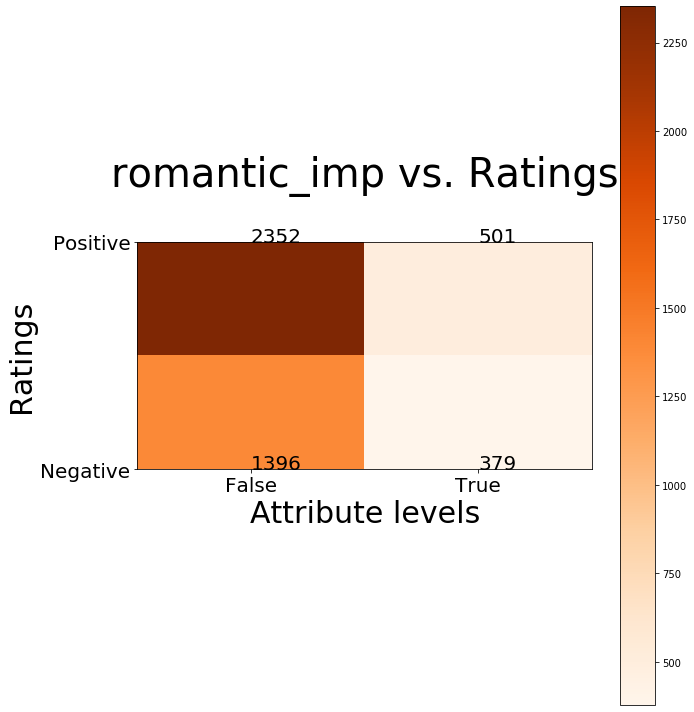

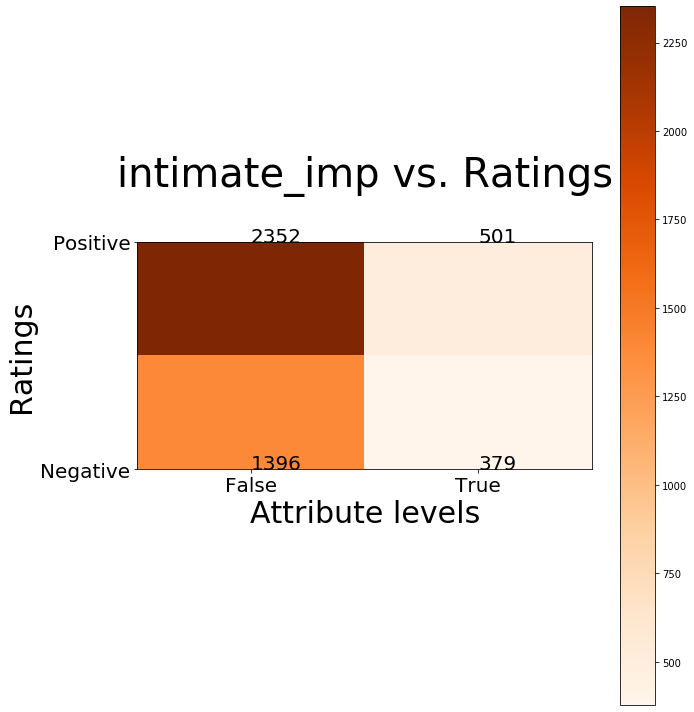

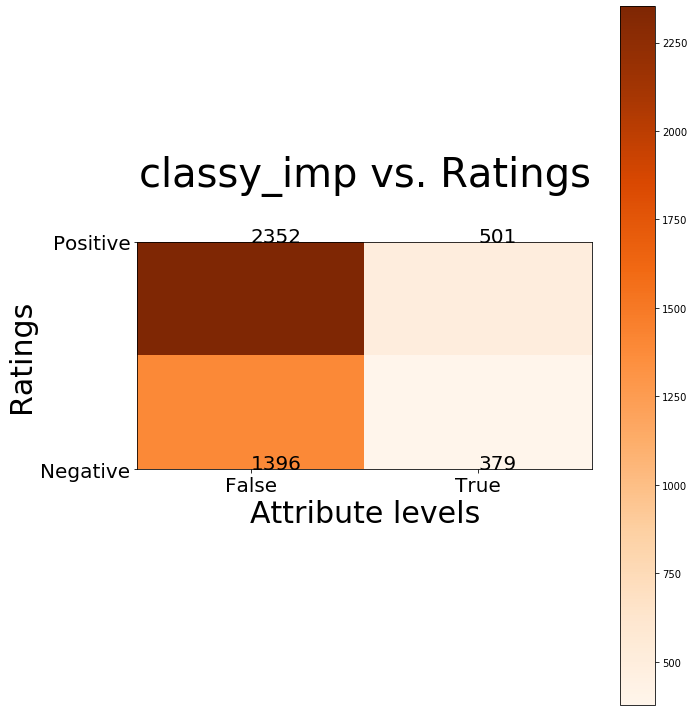

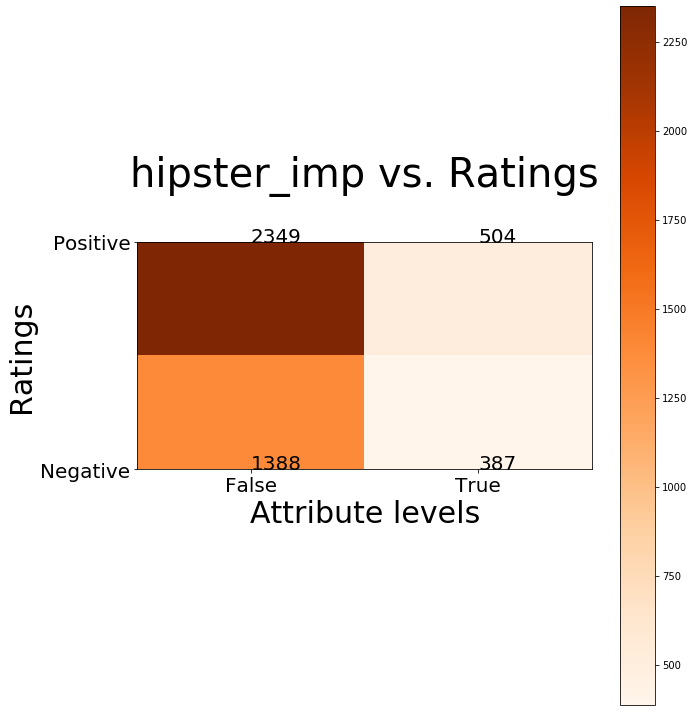

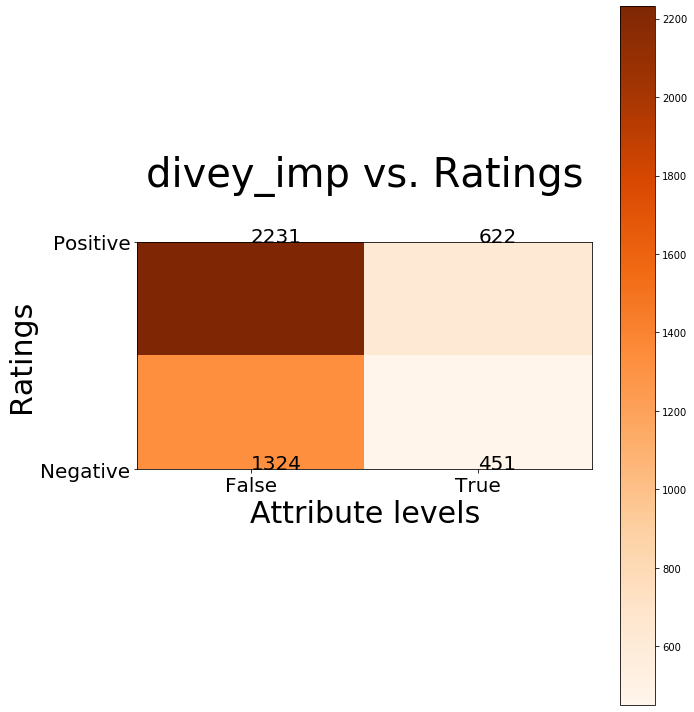

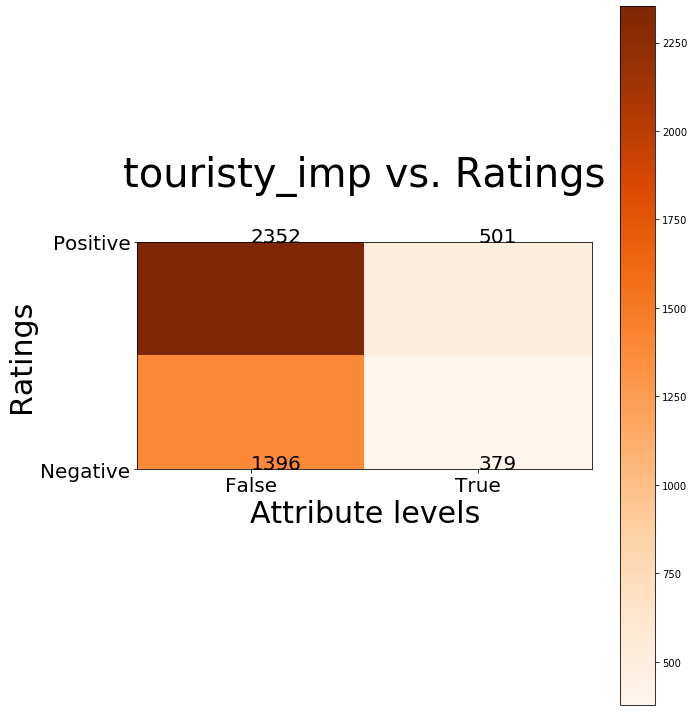

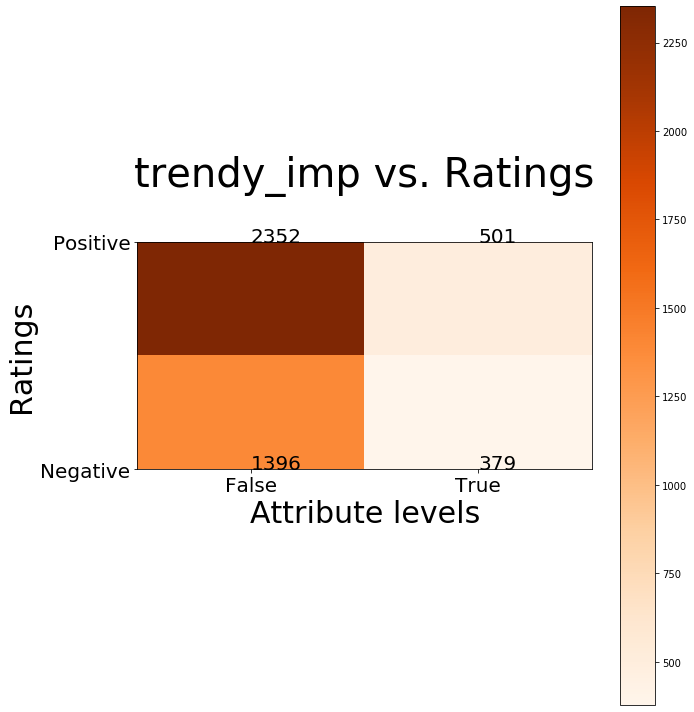

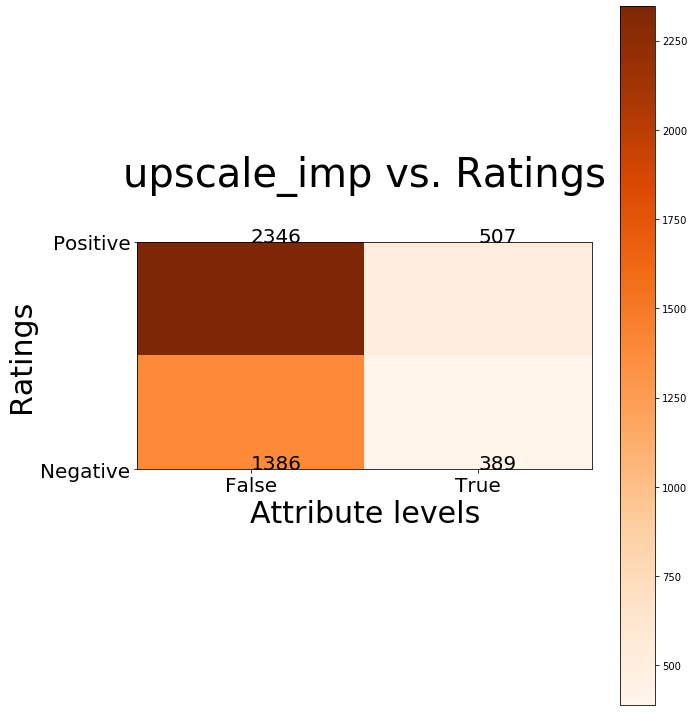

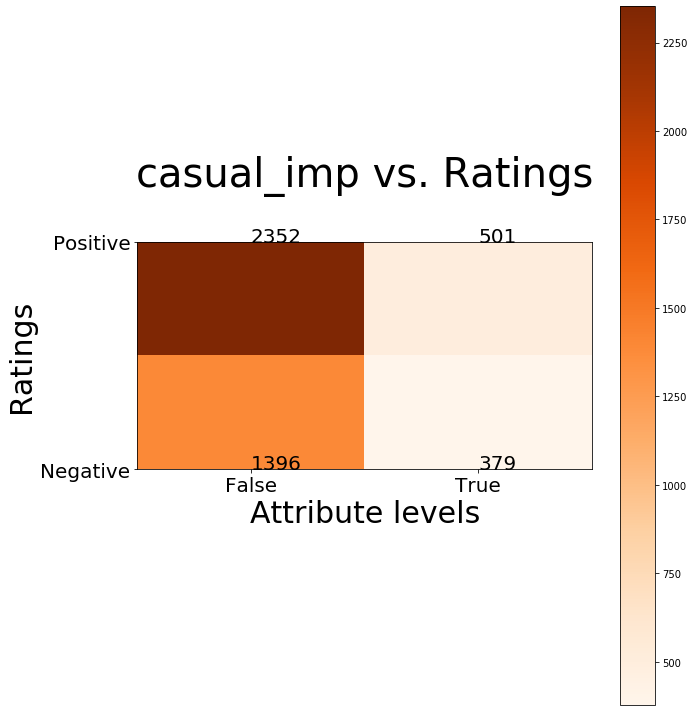

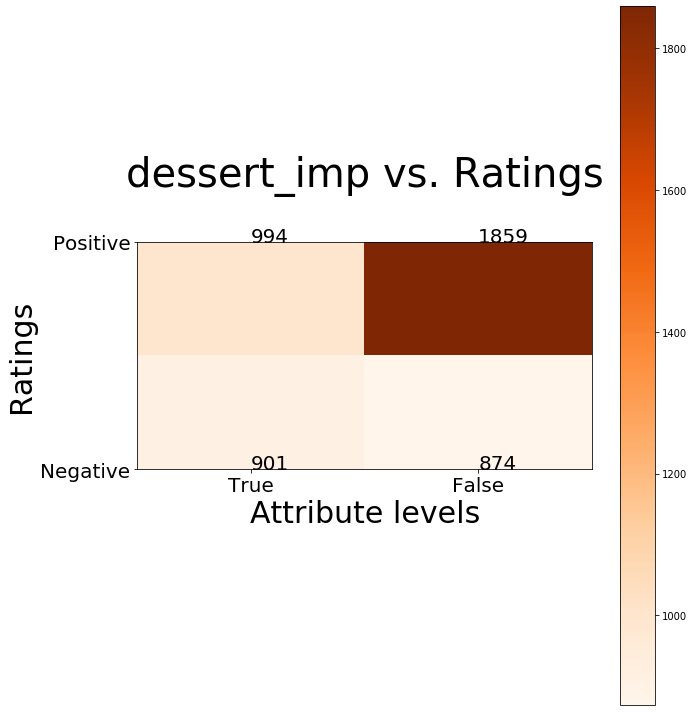

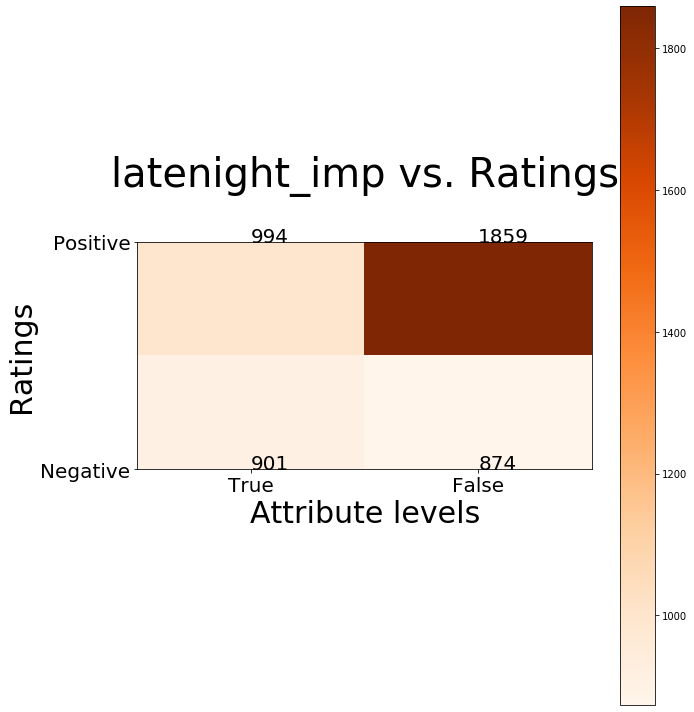

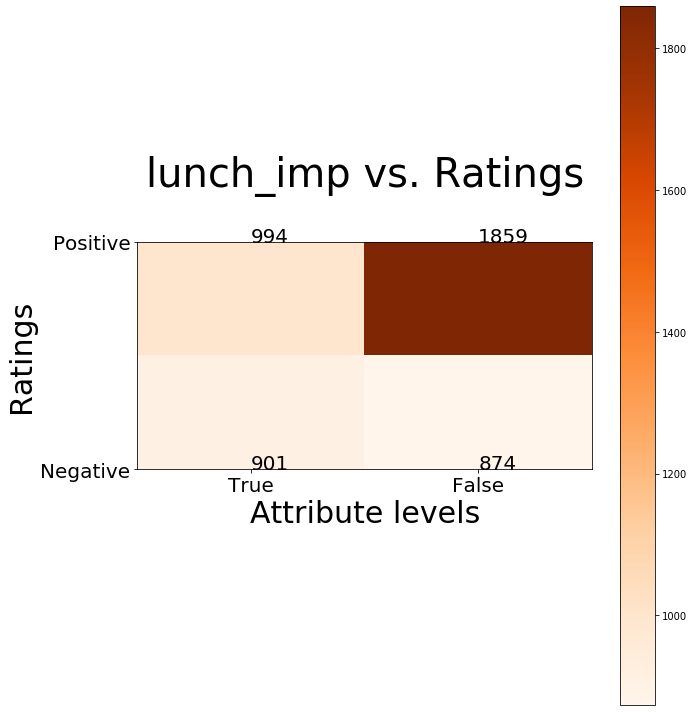

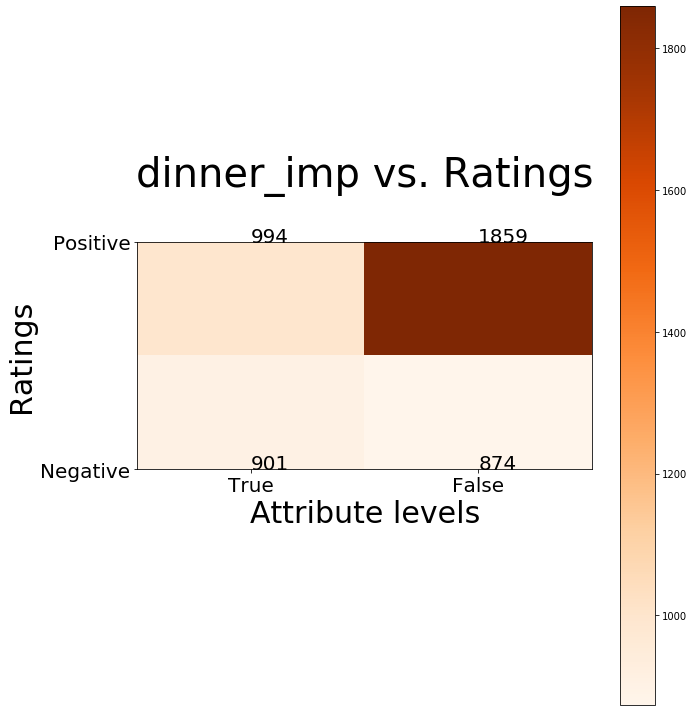

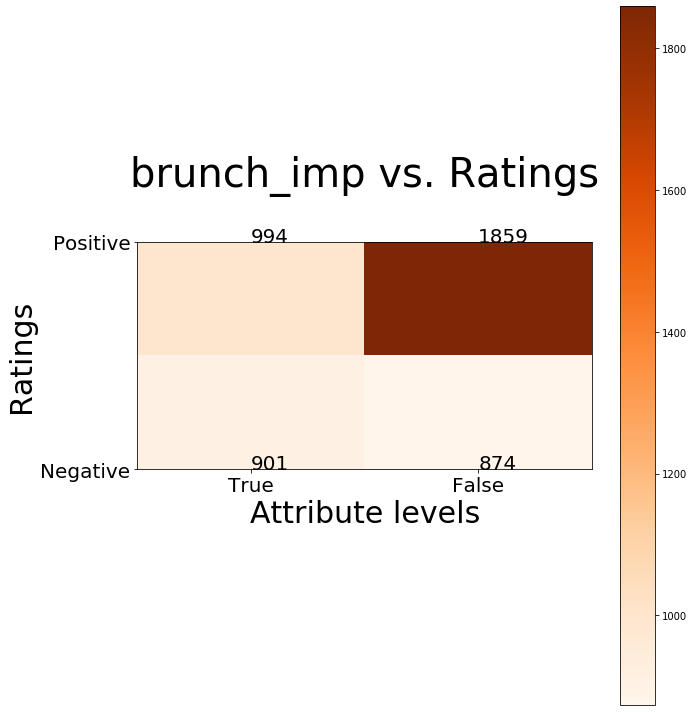

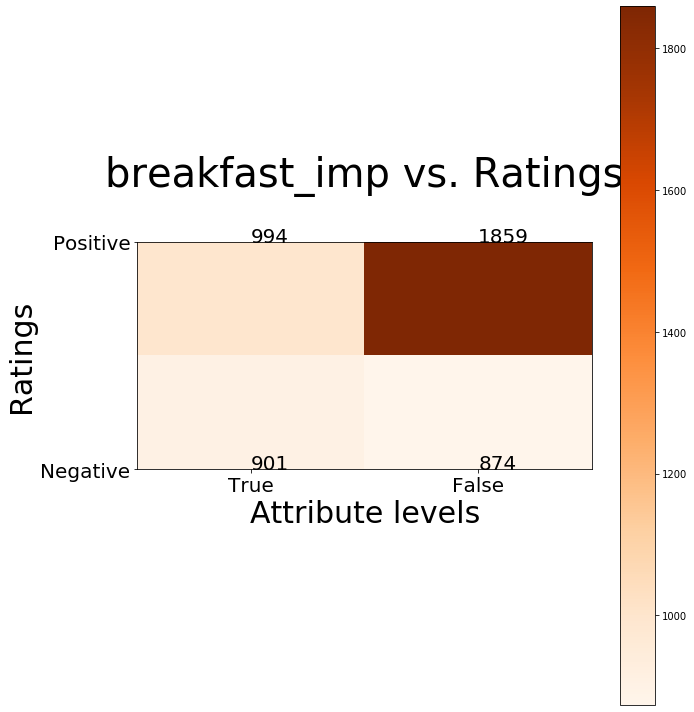

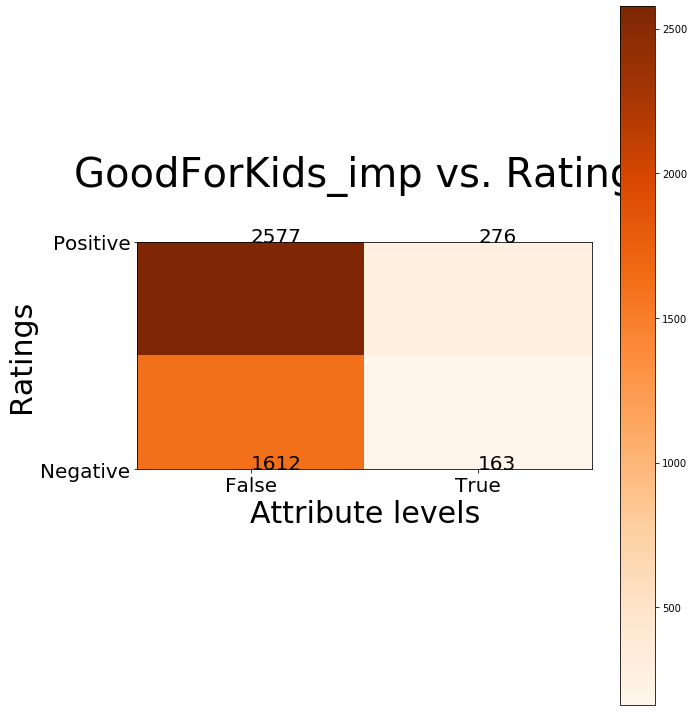

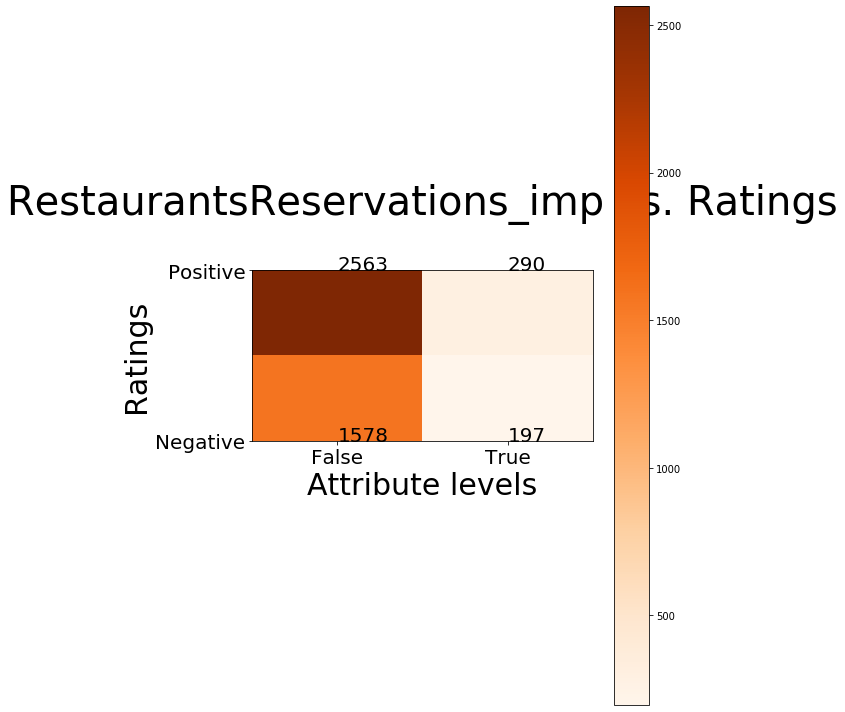

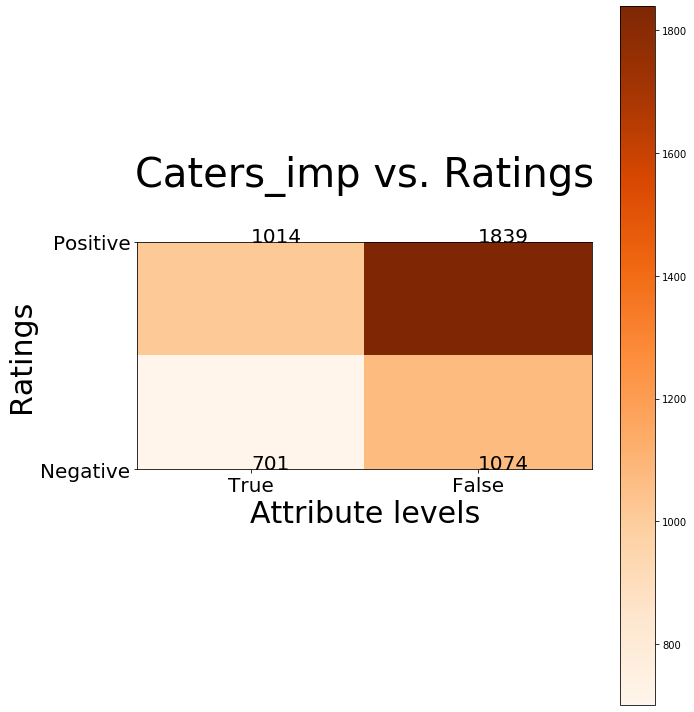

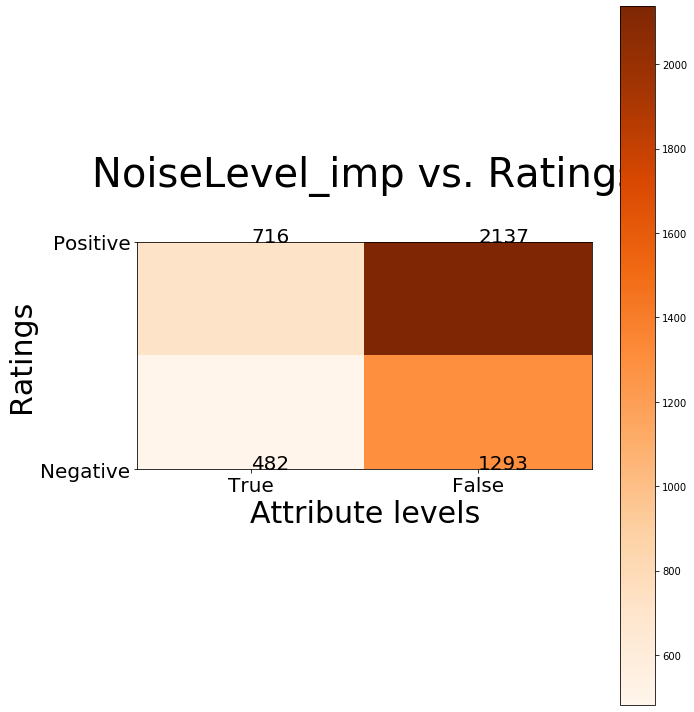

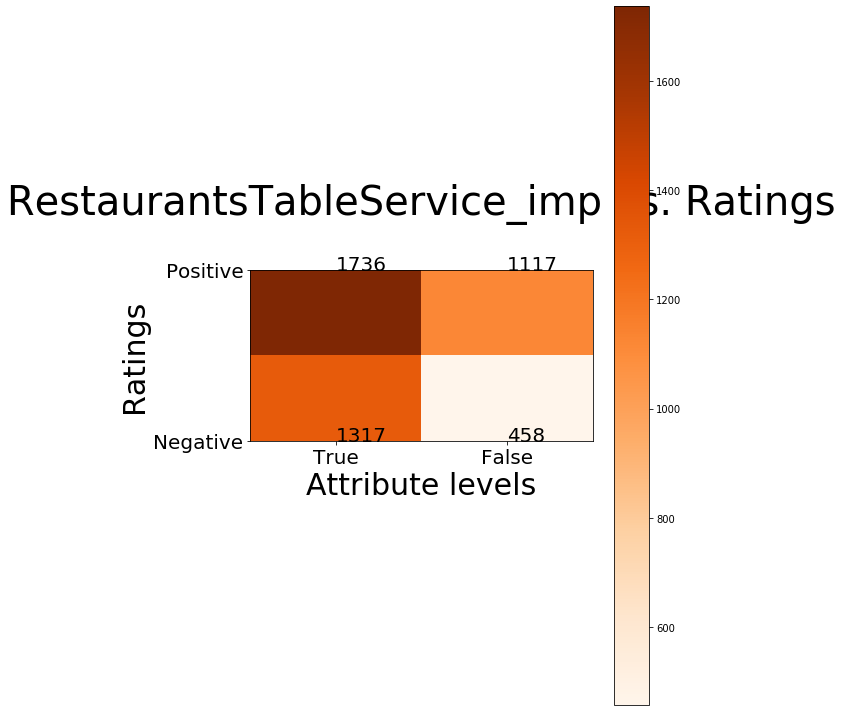

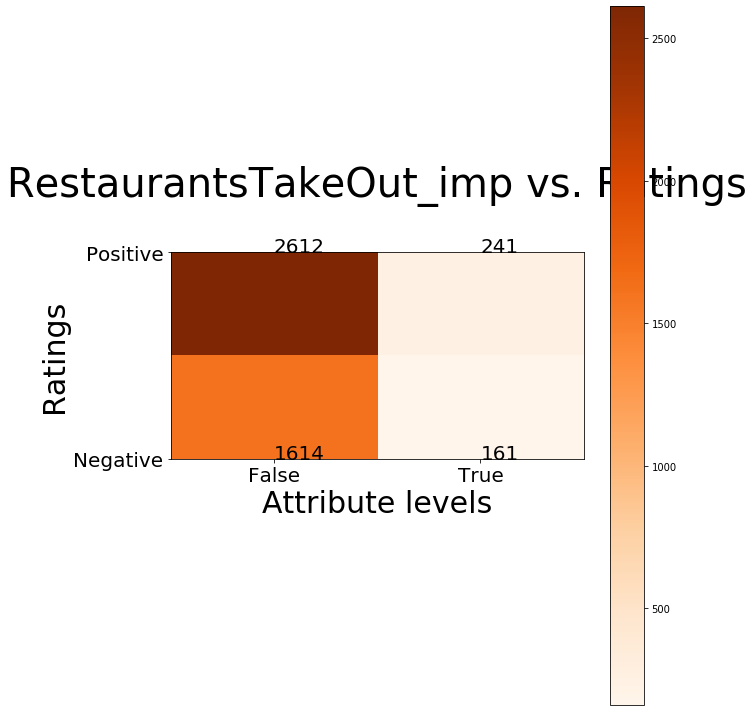

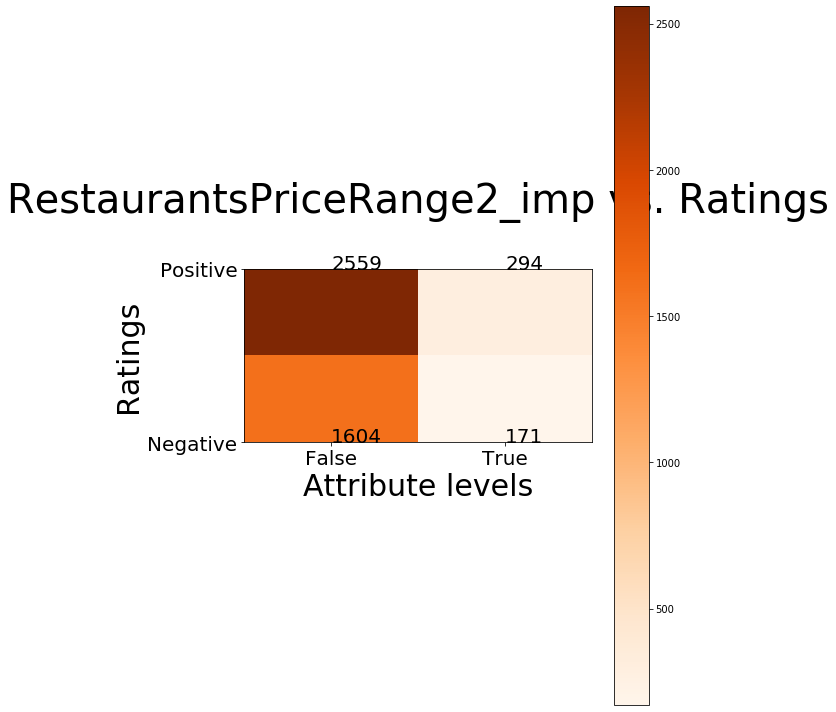

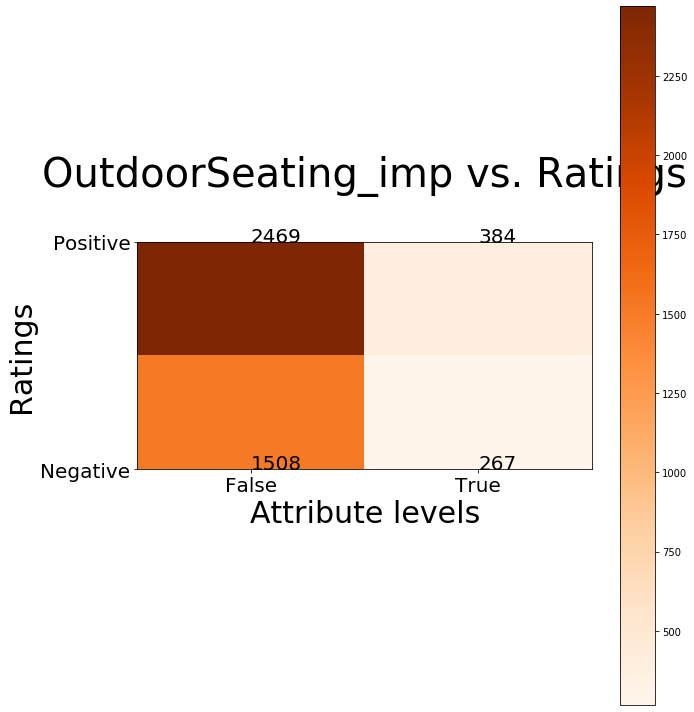

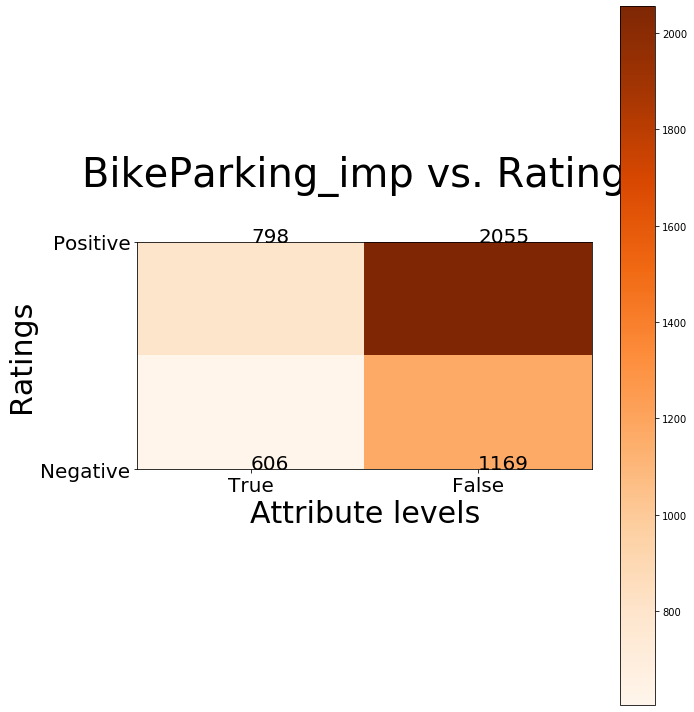

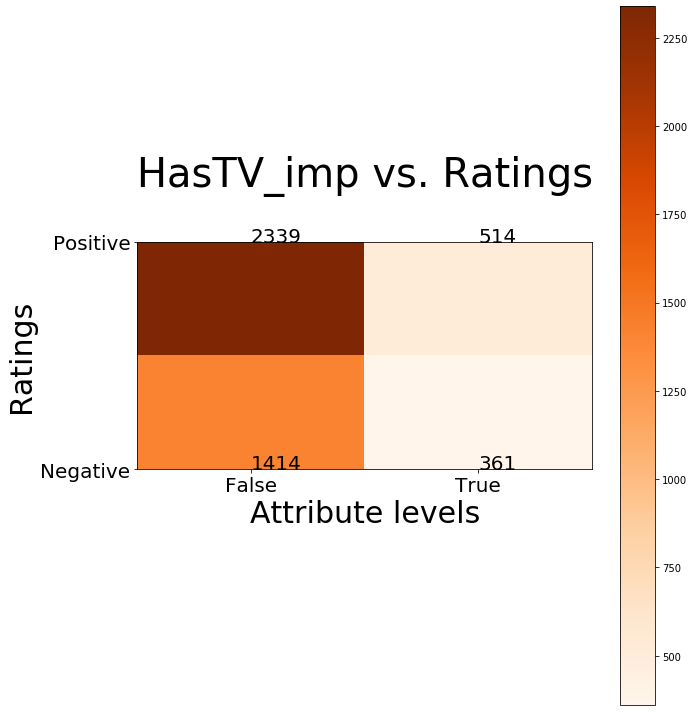

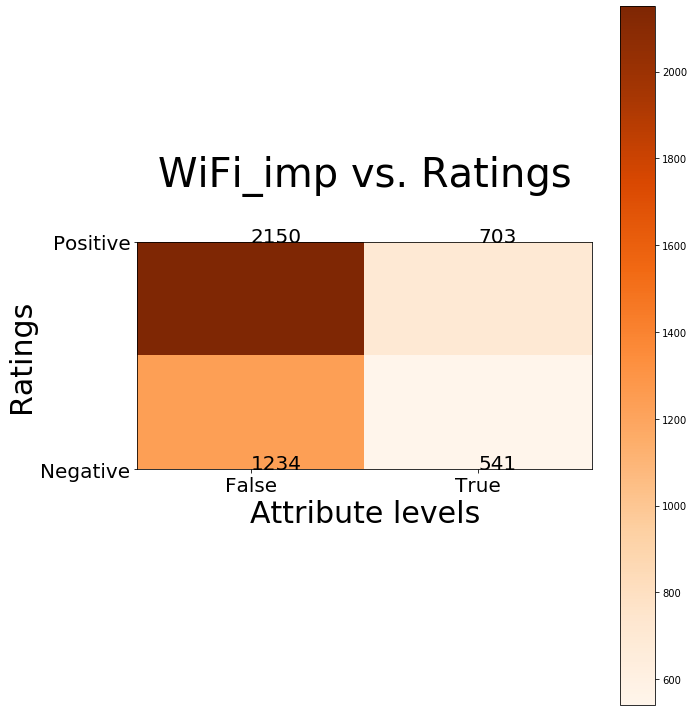

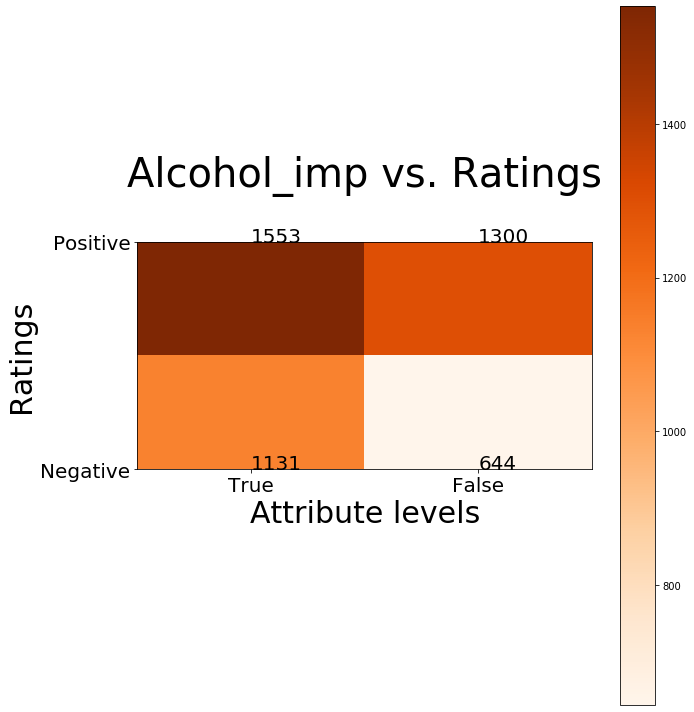

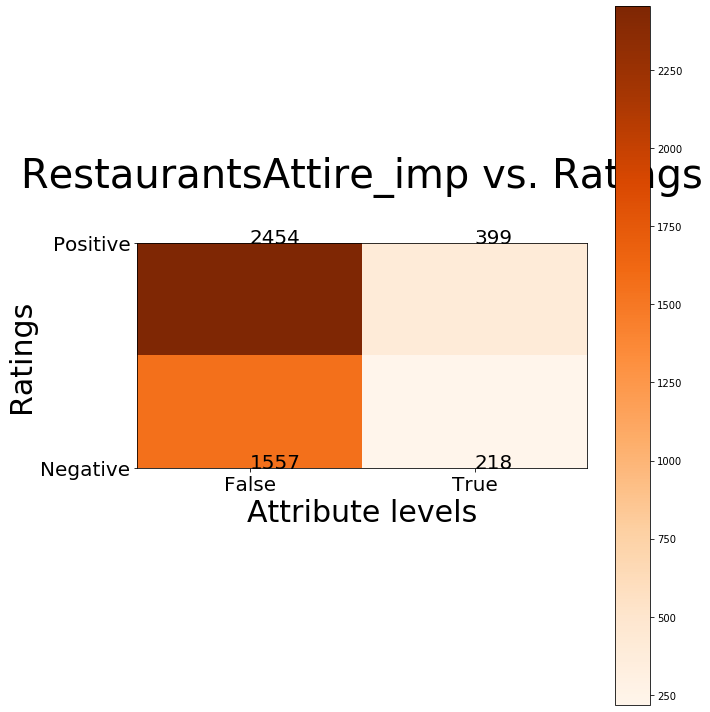

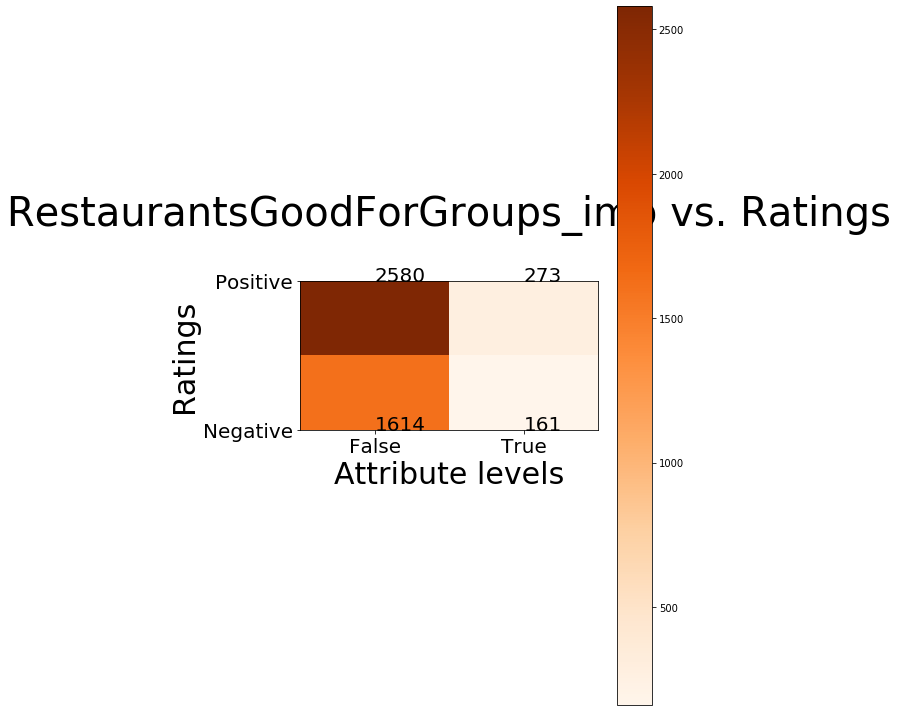

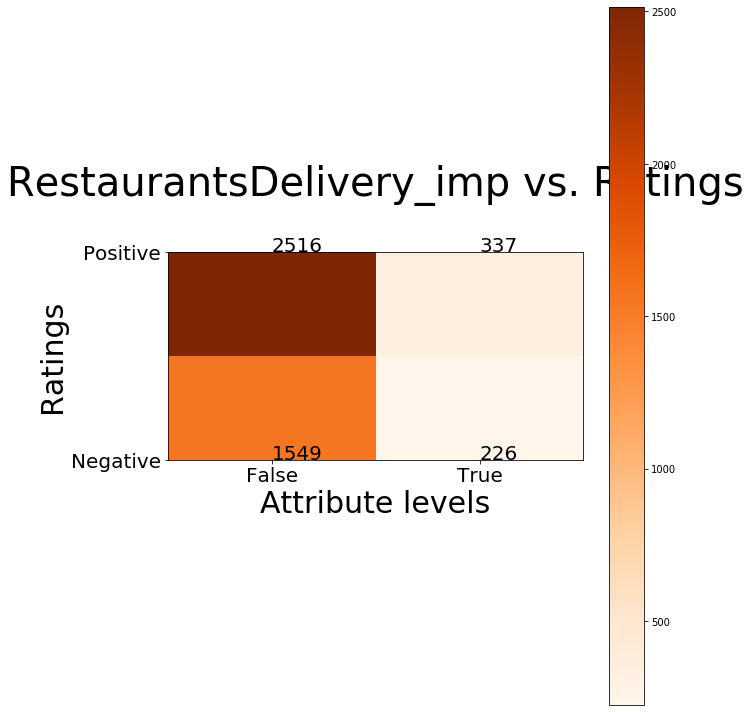

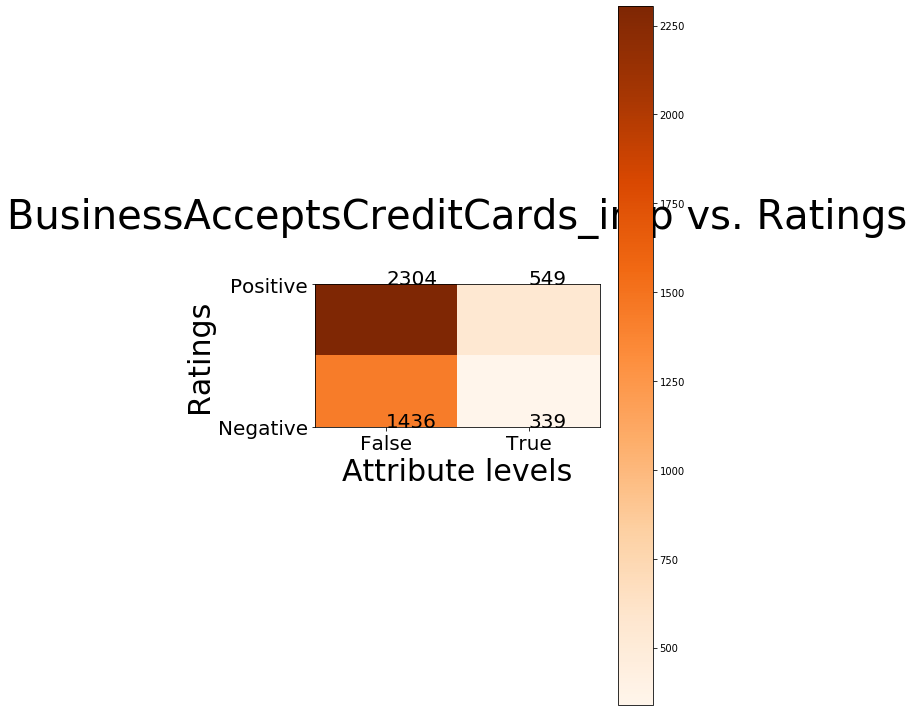

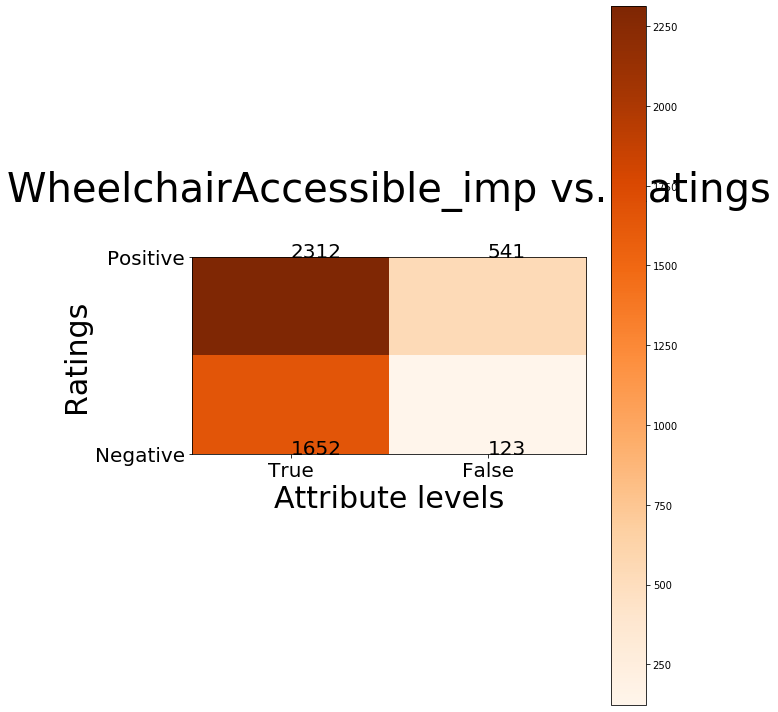

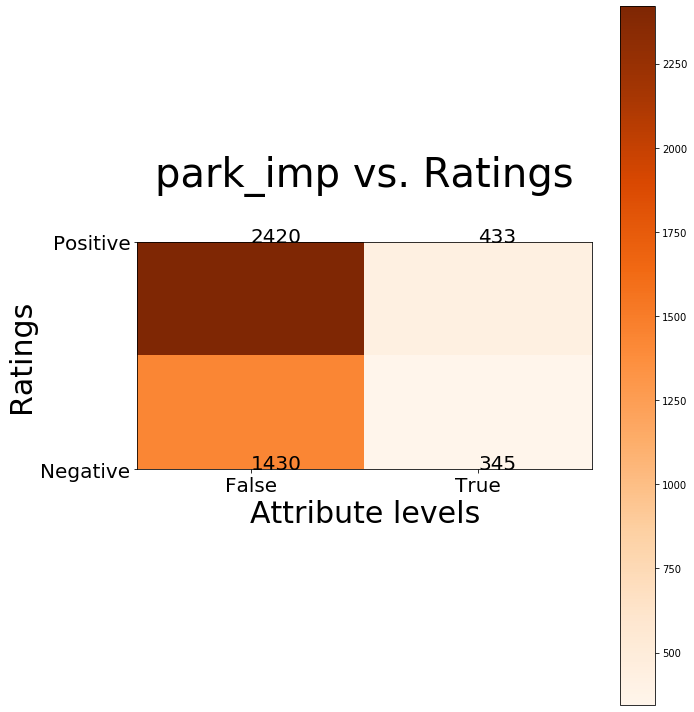

In [0]:
save_plot_matrixs(att, columns = att.columns[8:], level_type='categorical')